In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [2]:
train.shape

(1460, 81)

In [3]:
#understand the data
train.info()
train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
pd.options.display.float_format = '{:.0f}'.format
summary=train.describe()
summary.to_csv('summary.csv',sep=',')
print(summary)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
count 1460        1460         1201     1460         1460         1460   
mean   730          57           70    10517            6            6   
std    422          42           24     9981            1            1   
min      1          20           21     1300            1            1   
25%    366          20           59     7554            5            5   
50%    730          50           69     9478            6            5   
75%   1095          70           80    11602            7            6   
max   1460         190          313   215245           10            9   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count       1460          1460        1452        1460  ...        1460   
mean        1971          1985         104         444  ...          94   
std           30            21         181         456  ...         125   
min         1872          1950   

In [5]:
#Missing Values
train.isnull().sum()
total_nulls = train.isnull().sum().sum()
print(total_nulls)

7829


In [6]:
for col in train.columns:
    null_count=train[col].isnull().sum()
    print(f" {col}- null values {null_count}")

 Id- null values 0
 MSSubClass- null values 0
 MSZoning- null values 0
 LotFrontage- null values 259
 LotArea- null values 0
 Street- null values 0
 Alley- null values 1369
 LotShape- null values 0
 LandContour- null values 0
 Utilities- null values 0
 LotConfig- null values 0
 LandSlope- null values 0
 Neighborhood- null values 0
 Condition1- null values 0
 Condition2- null values 0
 BldgType- null values 0
 HouseStyle- null values 0
 OverallQual- null values 0
 OverallCond- null values 0
 YearBuilt- null values 0
 YearRemodAdd- null values 0
 RoofStyle- null values 0
 RoofMatl- null values 0
 Exterior1st- null values 0
 Exterior2nd- null values 0
 MasVnrType- null values 872
 MasVnrArea- null values 8
 ExterQual- null values 0
 ExterCond- null values 0
 Foundation- null values 0
 BsmtQual- null values 37
 BsmtCond- null values 37
 BsmtExposure- null values 38
 BsmtFinType1- null values 37
 BsmtFinSF1- null values 0
 BsmtFinType2- null values 38
 BsmtFinSF2- null values 0
 BsmtUnfSF- 

In [7]:
for col1 in train.columns:
    null_per=train[col1].isnull().mean()*100
    print(f" {col1}- null values {null_per}")

 Id- null values 0.0
 MSSubClass- null values 0.0
 MSZoning- null values 0.0
 LotFrontage- null values 17.73972602739726
 LotArea- null values 0.0
 Street- null values 0.0
 Alley- null values 93.76712328767123
 LotShape- null values 0.0
 LandContour- null values 0.0
 Utilities- null values 0.0
 LotConfig- null values 0.0
 LandSlope- null values 0.0
 Neighborhood- null values 0.0
 Condition1- null values 0.0
 Condition2- null values 0.0
 BldgType- null values 0.0
 HouseStyle- null values 0.0
 OverallQual- null values 0.0
 OverallCond- null values 0.0
 YearBuilt- null values 0.0
 YearRemodAdd- null values 0.0
 RoofStyle- null values 0.0
 RoofMatl- null values 0.0
 Exterior1st- null values 0.0
 Exterior2nd- null values 0.0
 MasVnrType- null values 59.726027397260275
 MasVnrArea- null values 0.547945205479452
 ExterQual- null values 0.0
 ExterCond- null values 0.0
 Foundation- null values 0.0
 BsmtQual- null values 2.5342465753424657
 BsmtCond- null values 2.5342465753424657
 BsmtExposure-

In [98]:
train=train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
test=test.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [99]:
train['LotFrontage'].unique()
train.LotFrontage.value_counts()
train.LotFrontage.value_counts()/train.shape[0]


,count
LotFrontage,
60,0
70,0
80,0
50,0
75,0
...,...
182,0
160,0
152,0


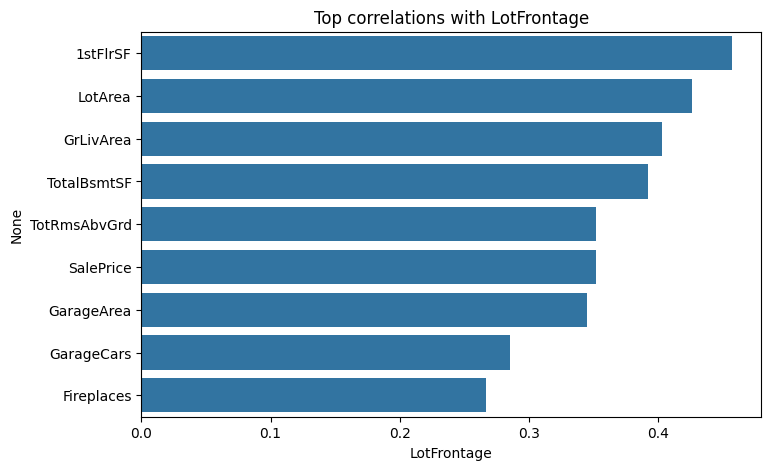

In [100]:
#LotFrontage is Missing at Random MAR
# We can check how strongly it correlates with the target variable (SalePrice) to decide what to do for null values and to
# check its impact
# using Correlation Matrix
#Use a heatmap or correlation matrix to quickly see which numerical features are correlated with LotFrontage

import seaborn as sns
import matplotlib.pyplot as plt

# Focus on numeric columns only
num_df = train.select_dtypes(include='number')

# Compute correlation with LotFrontage
corr1= num_df.corr()['LotFrontage'].sort_values(ascending=False)

# Plot top correlated features
plt.figure(figsize=(8, 5))
sns.barplot(x=corr1[1:10], y=corr1[1:10].index)  # skip self-correlation
plt.title('Top correlations with LotFrontage')
plt.show()


In [101]:
#Based on the correlation results, we will do missing values impuataion of LotFrontage using regression and bby making using of the strongest impact
#variables ('1stFlrSF','LotArea', 'GrlivArea', 'TotalBsmtSF')
top_features= ['1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF']
from sklearn.linear_model import LinearRegression

#Imputaion for Train_Data
#Split the data
df_train = train[train['LotFrontage'].notnull()]
df_missing = train[train['LotFrontage'].isnull()]

#Train the model
X_train = df_train[top_features]
y_train = df_train['LotFrontage']

model=LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict missing values
X_missing = df_missing[top_features]
predicted_values = model.predict(X_missing)

# Step 4: Fill in the missing values
train.loc[train['LotFrontage'].isnull(), 'LotFrontage'] = predicted_values


#Imputaion for Test_Data
####
#Split the data
df_test = test[test['LotFrontage'].notnull()]
df_missing1 = test[test['LotFrontage'].isnull()]

#Train the model
X_test = df_train[top_features]
y_test= df_train['LotFrontage']

model1=LinearRegression()
model1.fit(X_test, y_test)

# Step 3: Predict missing values
X_missing1 = df_missing1[top_features]
predicted_values1 = model.predict(X_missing1)

# Step 4: Fill in the missing values
test.loc[test['LotFrontage'].isnull(), 'LotFrontage'] = predicted_values1


# New Section

In [102]:
print(train['LotFrontage'].isnull().sum())
print(test['LotFrontage'].isnull().sum())

0
0


In [103]:
# Explore how MasVnrType missingness relates to MasVnrArea
train['MasVnrArea'].isnull().sum()
print(train[train['MasVnrType'].isnull()]['MasVnrArea'].value_counts())

test['MasVnrArea'].isnull().sum()
print(test[test['MasVnrType'].isnull()]['MasVnrArea'].value_counts())

MasVnrArea
0      859
1        2
288      1
344      1
312      1
Name: count, dtype: int64
MasVnrArea
0      876
285      1
1        1
198      1
Name: count, dtype: int64


 As per the table above, we can see that 99% of the missing values of MasVnrType becasue the coressponding MasVnrArea are missing and that suggests that there is no MasVnr for that house. Hence, the missing values in MasVnrType are MAR — Missing At Random.

In [104]:
train['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

Text(0.5, 0, 'types')

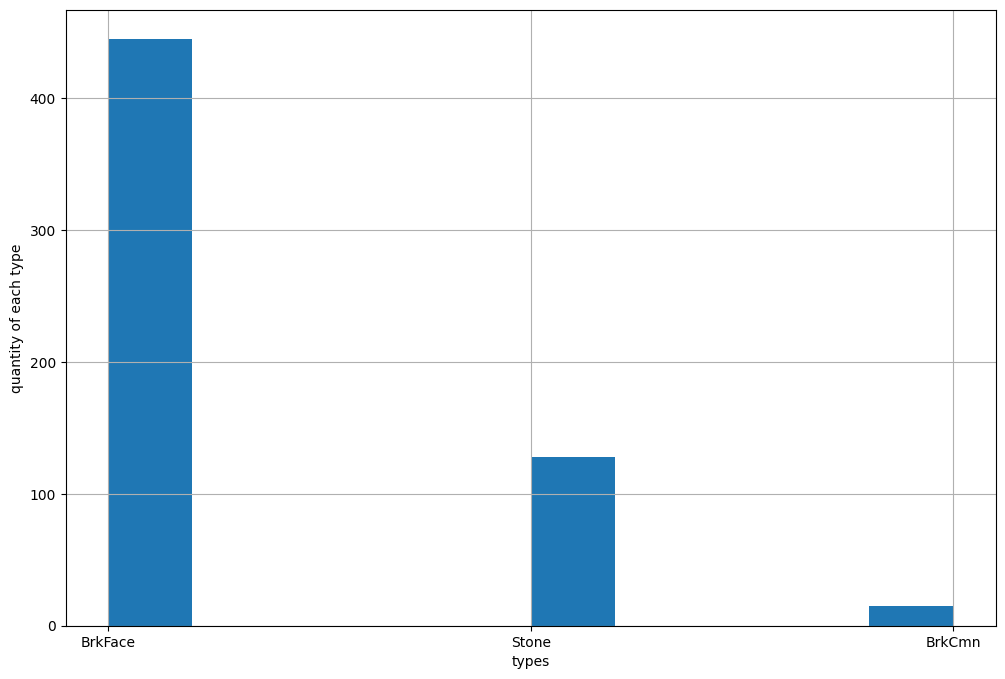

In [105]:
plt.figure(figsize=(12,8))
fig=train.MasVnrType.hist(bins=10)
fig.set_ylabel('quantity of each type')
fig.set_xlabel('types')

In [106]:
# Fill missing MasVnrType with 'None' if MasVnrArea is 0 (or even missing just in case)
#Trian
train.loc[
    (train['MasVnrType'].isnull()) & ((train['MasVnrArea'] == 0) | (train['MasVnrArea'].isnull())),
    'MasVnrType'
] = 'None'

#If any remaining values are still NaN, impute them using mode (just in case of data entry error)
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])


#Test:
test.loc[
    (test['MasVnrType'].isnull()) & ((test['MasVnrArea'] == 0) | (test['MasVnrArea'].isnull())),
    'MasVnrType'
] = 'None'

test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])


Missing values for Train after imputation: 0
Updated distribution:
MasVnrType
None      1
BrkFace   0
Stone     0
BrkCmn    0
Name: proportion, dtype: float64
Missing values for Test after imputation: 0
Updated distribution:
MasVnrType
None      1
BrkFace   0
Stone     0
BrkCmn    0
Name: proportion, dtype: float64


Text(0.5, 0, 'types')

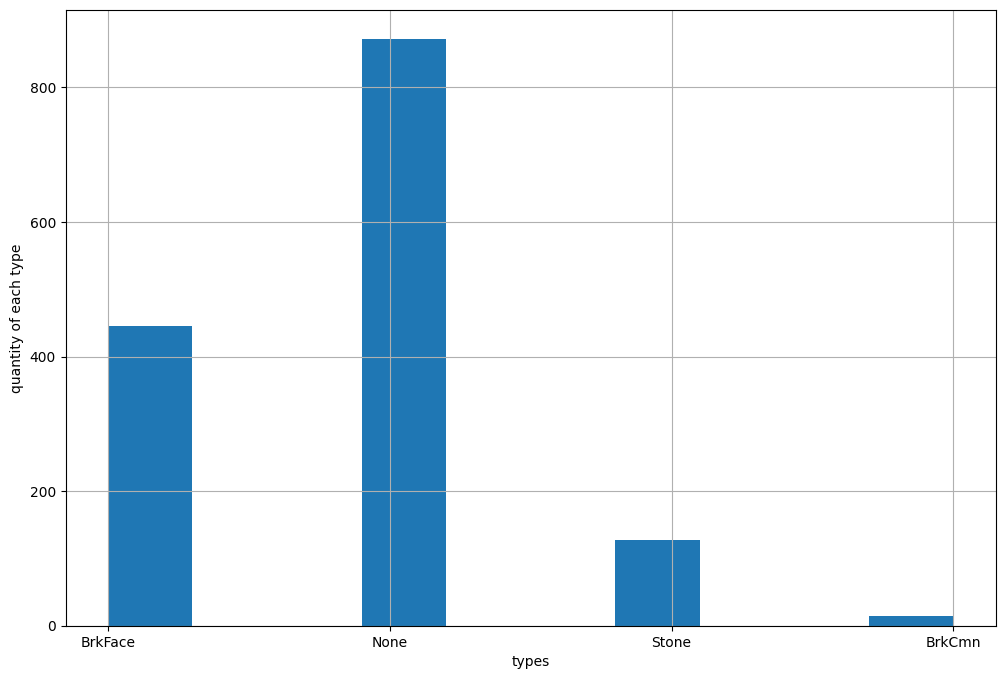

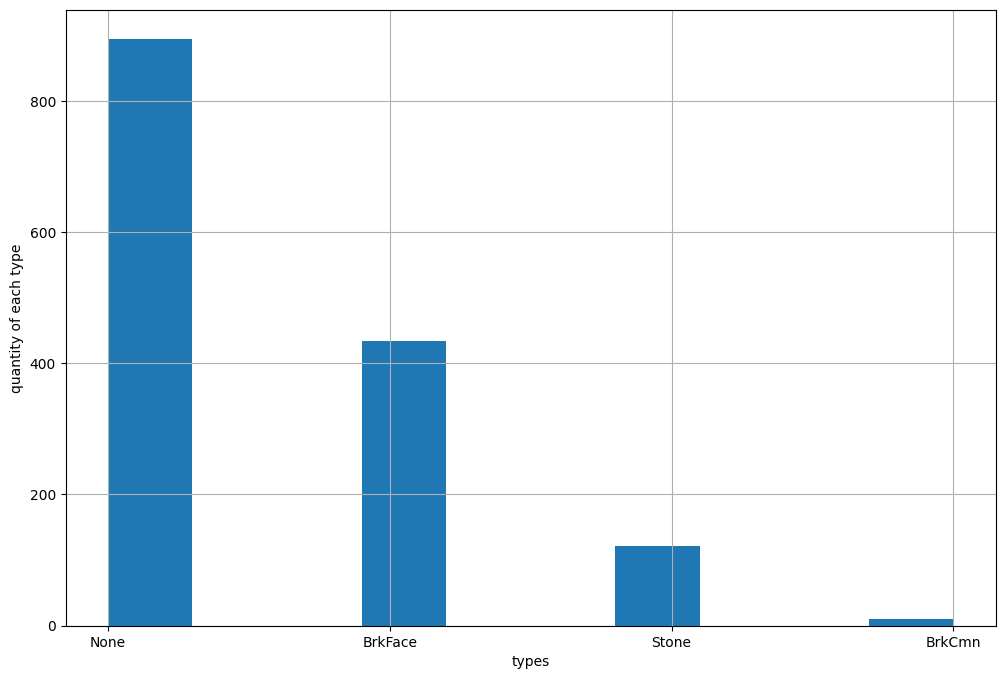

In [107]:
print("Missing values for Train after imputation:", train['MasVnrType'].isnull().sum())
print("Updated distribution:")
print(train['MasVnrType'].value_counts(normalize=True))
plt.figure(figsize=(12,8))
fig=train.MasVnrType.hist(bins=10)
fig.set_ylabel('Train_data')
fig.set_ylabel('quantity of each type')
fig.set_xlabel('types')


print("Missing values for Test after imputation:", test['MasVnrType'].isnull().sum())
print("Updated distribution:")
print(test['MasVnrType'].value_counts(normalize=True))
plt.figure(figsize=(12,8))
fig=test.MasVnrType.hist(bins=10)
fig.set_ylabel('Test_data')
fig.set_ylabel('quantity of each type')
fig.set_xlabel('types')

Text(0.5, 0, 'types')

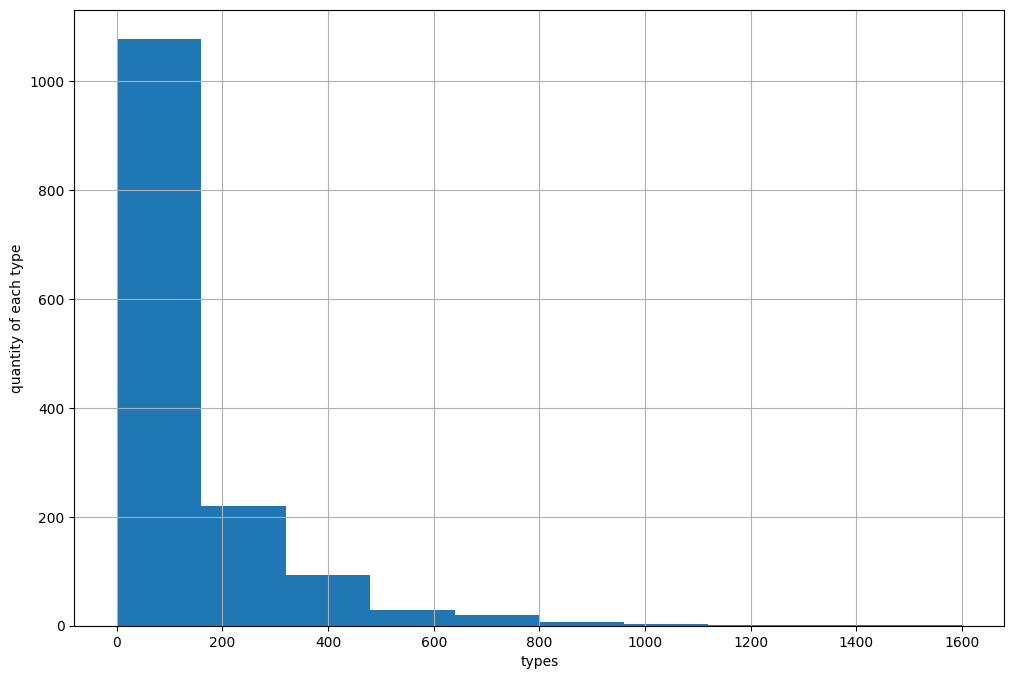

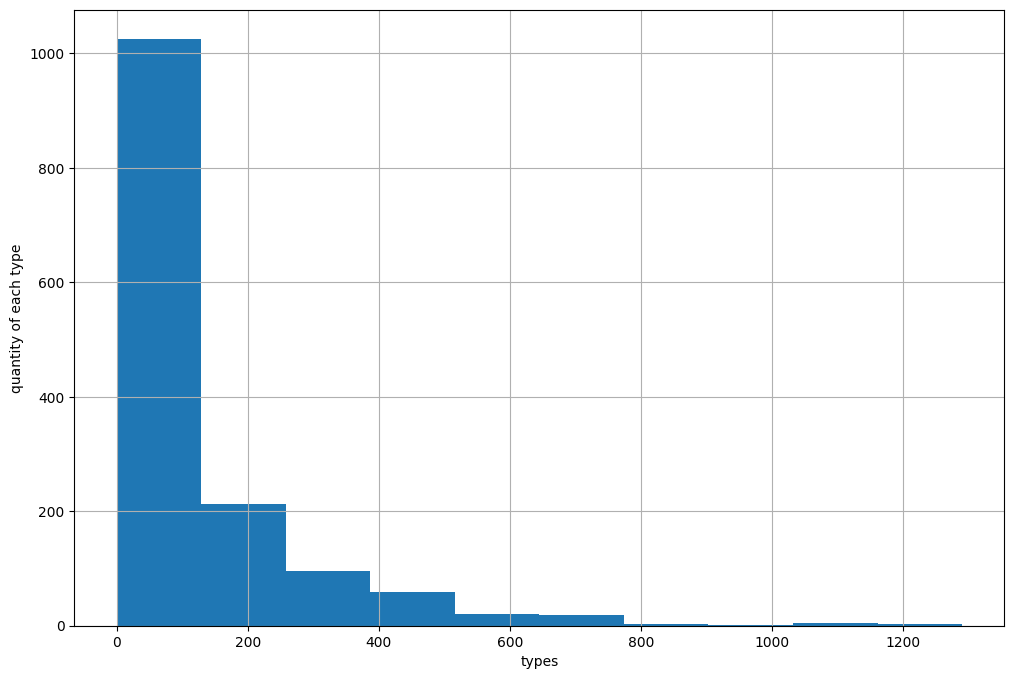

In [18]:
plt.figure(figsize=(12,8))
fig=train.MasVnrArea.hist(bins=10)
fig.set_ylabel('quantity of each type')
fig.set_xlabel('types')
####
plt.figure(figsize=(12,8))
fig=test.MasVnrArea.hist(bins=10)
fig.set_ylabel('quantity of each type')
fig.set_xlabel('types')

Since the distribution of MasVarArea is highly Skewed, and also the percentage of missing values is really low. Therefore, missing data is imputed using Median

In [108]:
a1=train['MasVnrArea'].median()
train['MasVnrArea'] = train['MasVnrArea'].fillna(a1)

a2=test['MasVnrArea'].median()
test['MasVnrArea'] = test['MasVnrArea'].fillna(a2)

In [109]:
no_basement = train['TotalBsmtSF'] == 0
bsmtqual_missing = train['BsmtQual'].isnull()

# Rows where TotalBsmtSF is 0 but BsmtQual is not missing
check1 = train[no_basement & (~bsmtqual_missing)]
print(f"Rows with TotalBsmtSF = 0 but BsmtQual is NOT missing: {check1.shape[0]}")

# Rows where BsmtQual is missing but TotalBsmtSF is not 0
check2 = train[bsmtqual_missing & (train['TotalBsmtSF'] != 0)]
print(f"Rows with BsmtQual missing but TotalBsmtSF ≠ 0: {check2.shape[0]}")

if check1.shape[0] > 0:
    print(" Some rows have 0 SF but non-null BsmtQual:\n")
    display(check1[['TotalBsmtSF', 'BsmtQual', 'BsmtCond']])

if check2.shape[0] > 0:
    print("Some rows have missing BsmtQual but non-zero basement area:\n")
    display(check2[['TotalBsmtSF', 'BsmtQual', 'BsmtCond']])

suspecious_bmstqual = train[(train['TotalBsmtSF'] != 0) & (train['BsmtQual'].isnull())]
suspecious_bmstcond = train[(train['TotalBsmtSF'] != 0) & (train['BsmtCond'].isnull())]
print(f"BsmtQual missing but TotalBsmtSF > 0: {suspecious_bmstqual.shape[0]} rows")
print(f"BsmtCond missing but TotalBsmtSF > 0: {suspecious_bmstcond.shape[0]} rows")

Rows with TotalBsmtSF = 0 but BsmtQual is NOT missing: 0
Rows with BsmtQual missing but TotalBsmtSF ≠ 0: 0
BsmtQual missing but TotalBsmtSF > 0: 0 rows
BsmtCond missing but TotalBsmtSF > 0: 0 rows


In [110]:
#train['TotalBsmtSF'].unique()
no_basement=train['TotalBsmtSF']==0
train.loc[no_basement,'BsmtQual'] = 'None'
train.loc[no_basement,'BsmtCond'] = 'None'

Since TotalBsmtSF represents the total area of the basemnt; and total area=0 coresspondes to missing values on BsmtQual and BsmtCond (after checking). Hence, we will impute the missing vlaues in bsmtquad and bsmtcond using "None"

In [111]:
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
#####
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')

In [112]:
#the same impuation applied to "BsmtExposure" ,"BsmtFinType1" , and "BsmtFinType2" becuase when the basment_area is zero, so there is no exposure:
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
#####
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')

In [113]:
train['Electrical'].unique()
#Since there is only 1 value missing in Electrical, and it's categrical so it's better to impute it using Mode
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
####
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

In [114]:
# Check how many FireplaceQu are missing when Fireplaces == 0
mask = (train['FireplaceQu'].isnull()) & (train['Fireplaces'] == 0)
print(f"Missing FireplaceQu where Fireplaces = 0: {mask.sum()}")

# Check how many are missing and Fireplaces > 0 (suspicious)
suspicious = train[(train['FireplaceQu'].isnull()) & (train['Fireplaces'] > 0)]
print(f"Suspicious missing values: {suspicious.shape[0]}")

train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
####

test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

Missing FireplaceQu where Fireplaces = 0: 690
Suspicious missing values: 0


In [115]:
# Check if all missing garage info corresponds to no garage area and no garage cars
garage_missing = train[train['GarageType'].isnull()]

print("GarageArea when GarageType is null:")
print(garage_missing['GarageArea'].unique())

print("GarageCars when GarageType is null:")
print(garage_missing['GarageCars'].unique())

garage_cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cat_cols:
    train[col] = train[col].fillna('None')

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)  # Special case: numerical, no garage

####
garage_cat_cols1= ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col1 in garage_cat_cols1:
    test[col1] = test[col1].fillna('None')

test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)


GarageArea when GarageType is null:
[0]
GarageCars when GarageType is null:
[0]


In [27]:
test.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,0
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [116]:
# Find fully duplicated rows
#Train
duplicate_rows1=train[train.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows1)}")

##Test
duplicate_rows2=test[test.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows2)}")

Number of duplicate rows: 0
Number of duplicate rows: 0


2nd step is handling the outliers:

It's importnat to focus on key numeric features that are:

- High impact on price

- Prone to extreme values

- Commonly used in modeling

Top Columns to Check for Outliers in Housing Data:

SalePrice	Target variable — obviously crucial.

GrLivArea	Strongest predictor of price (above-ground space).

LotArea	Lot size, often has massive skew or land outliers.

TotalBsmtSF	Total basement area, can be extremely large.

1stFlrSF First-floor area, similar to GrLivArea sometimes.

BedroomAbvGr Usually limited, but checking for unrealistic numbers.

GarageArea Usually under 1000 sq ft; over 1500 = suspicious.

MasVnrArea Can be 0, but some have very high values.

FullBath Normally 1–3; more might be a flag.

Tree-based models are robust to outliers in the predictor variables (features), but outliers in the target variable (SalePrice) can still cause problems, especially if they contradict strong patterns.

Suggested Action Plan:
1. Keep Most Outliers in Feature Columns
Because Random Forests & GBMs don't rely on mean-squared splits, they aren't skewed much by extreme values.

We do not need to remove high or low values from predictors unless they contradict the target value badly.

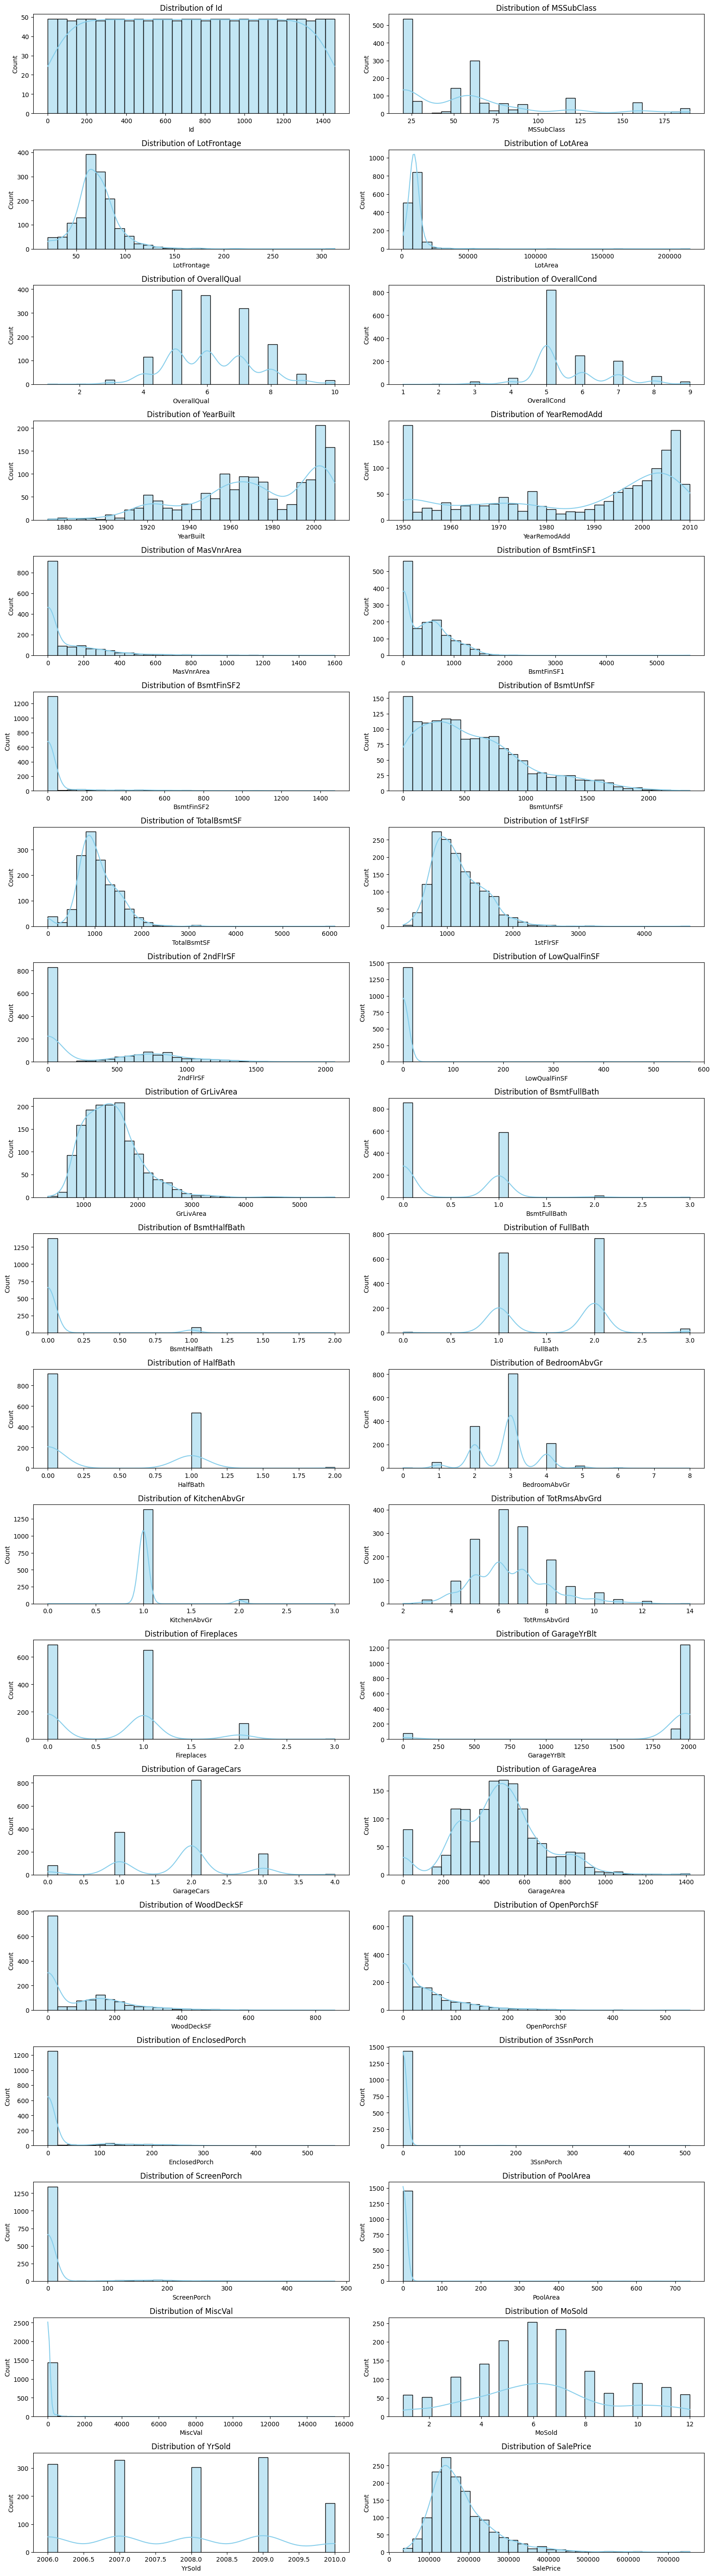

In [117]:
#Showing the distribtuions of the numerical variables
# Select only numeric columns
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Plot distribution for each numeric variable
plt.figure(figsize=(16, 60))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i + 1)
    sns.histplot(train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

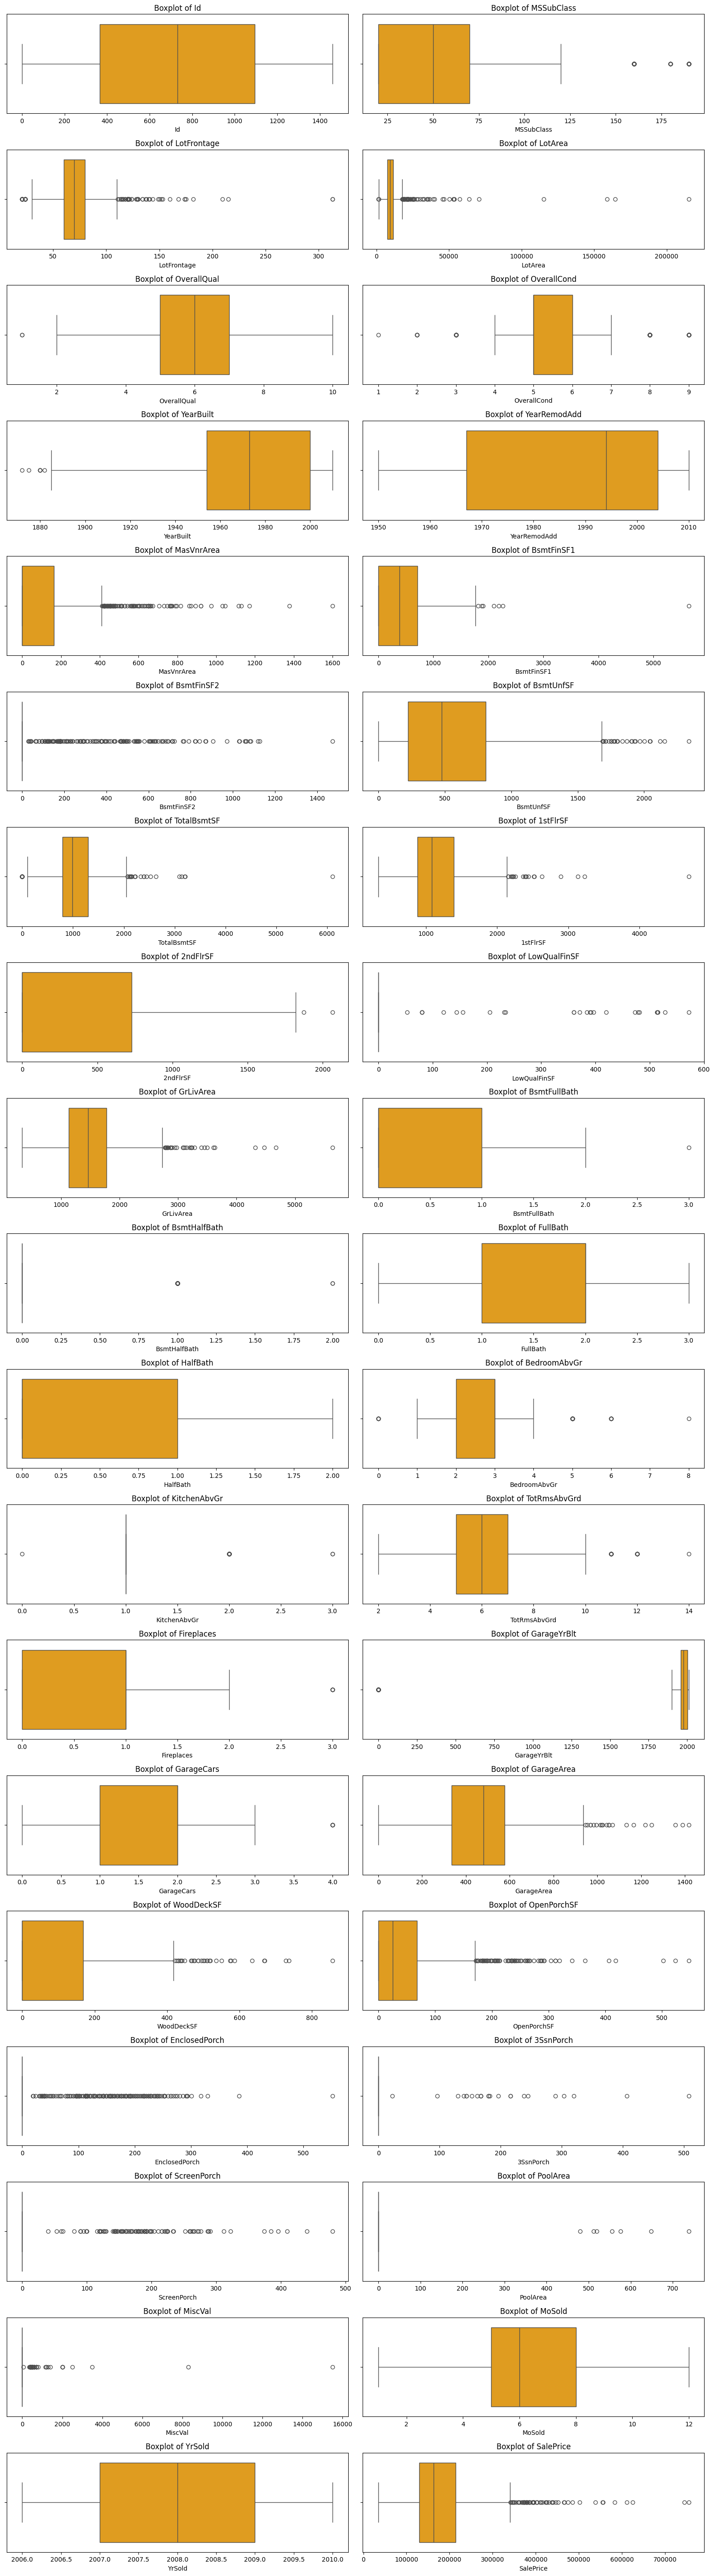

In [30]:
#Showing the boxplots of the numerical values
plt.figure(figsize=(16, 60))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i + 1)
    sns.boxplot(x=train[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

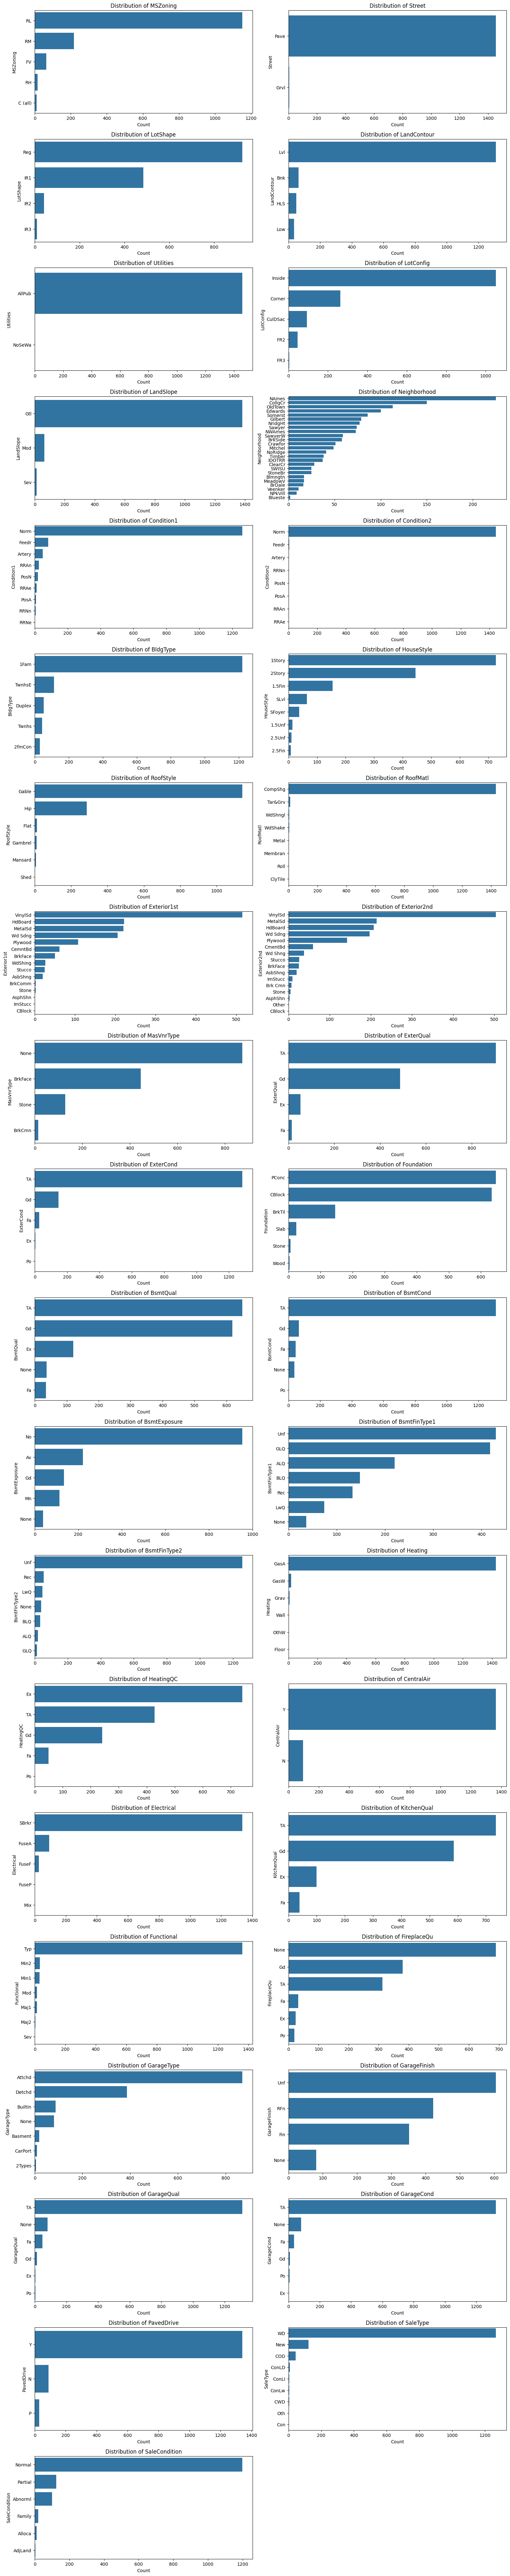

In [31]:
#Showing the distributions of the categorical variables
# Select categorical variables
categorical_cols = train.select_dtypes(include='object').columns

# Plot count plots
plt.figure(figsize=(16, len(categorical_cols) * 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 2, i + 1)
    sns.countplot(data=train, y=col, order=train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


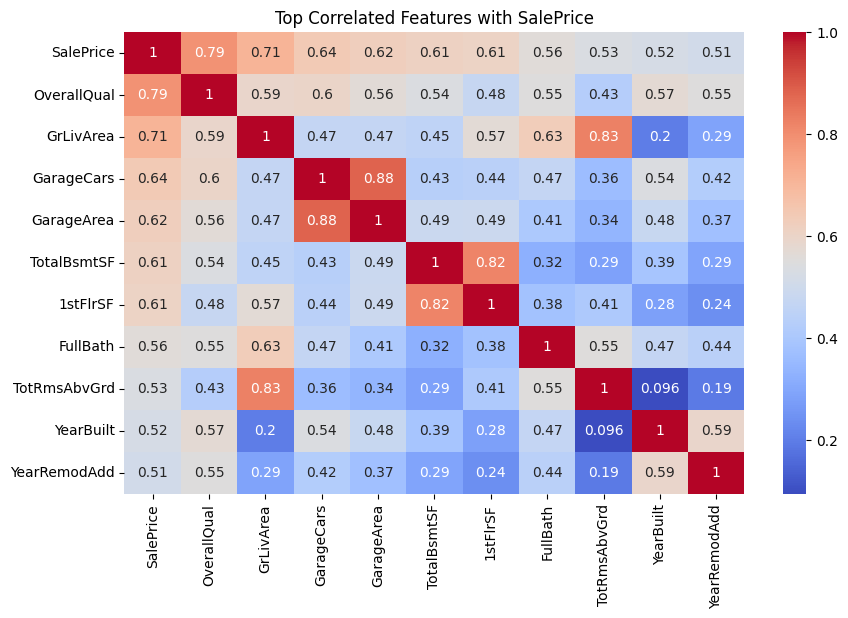

Top 10 correlated features with SalePrice:
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


In [118]:
#Use a heatmap or correlation matrix to see which numerical features are highly correlated with SalePrice

# Select only numeric columns
numeric_features=train.select_dtypes(include=['int64', 'float64'])

# Compute correlation with SalePrice
correlation_matrix= numeric_features.corr()

# Plot top 10 features most correlated with SalePrice
top_corr=correlation_matrix['SalePrice'].sort_values(ascending=False).head(11)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()

top_feature_names = top_corr.index[1:].tolist()  # Skip 'SalePrice' itself
print("Top 10 correlated features with SalePrice:")
print(top_feature_names)



Top Numerical Features by Robust Correlation:
              robust_score  spearman  kendall  mic
OverallQual              1         1        1    1
GrLivArea                1         1        1    0
GarageCars               1         1        1    0
GarageArea               1         1        0    0
YearBuilt                1         1        0    0
TotalBsmtSF              0         1        0    0
FullBath                 0         1        1    0
1stFlrSF                 0         1        0    0
GarageYrBlt              0         1        0    0
YearRemodAdd             0         1        0    0

Significant Categorical Features by ANOVA:
         feature  f_value  p_value  n_categories
18     ExterQual      443        0             4
30   KitchenQual      408        0             4
21      BsmtQual      393        0             4
34  GarageFinish      251        0             3
20    Foundation      100        0             6
28    CentralAir       98        0             2
27    

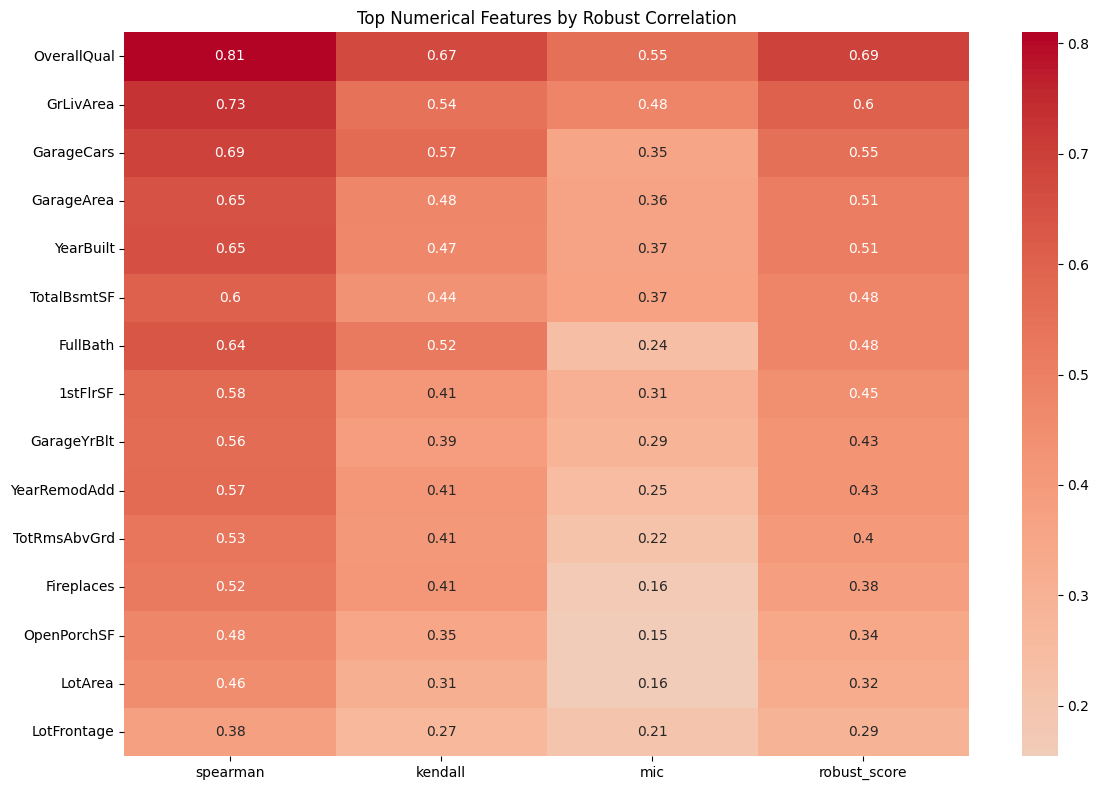

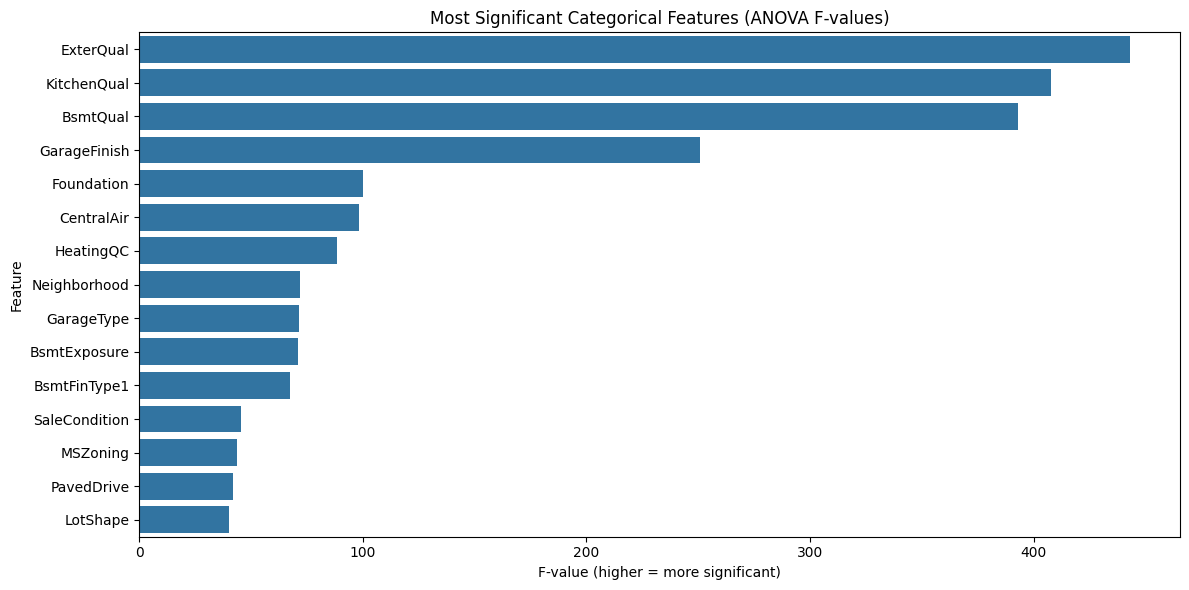

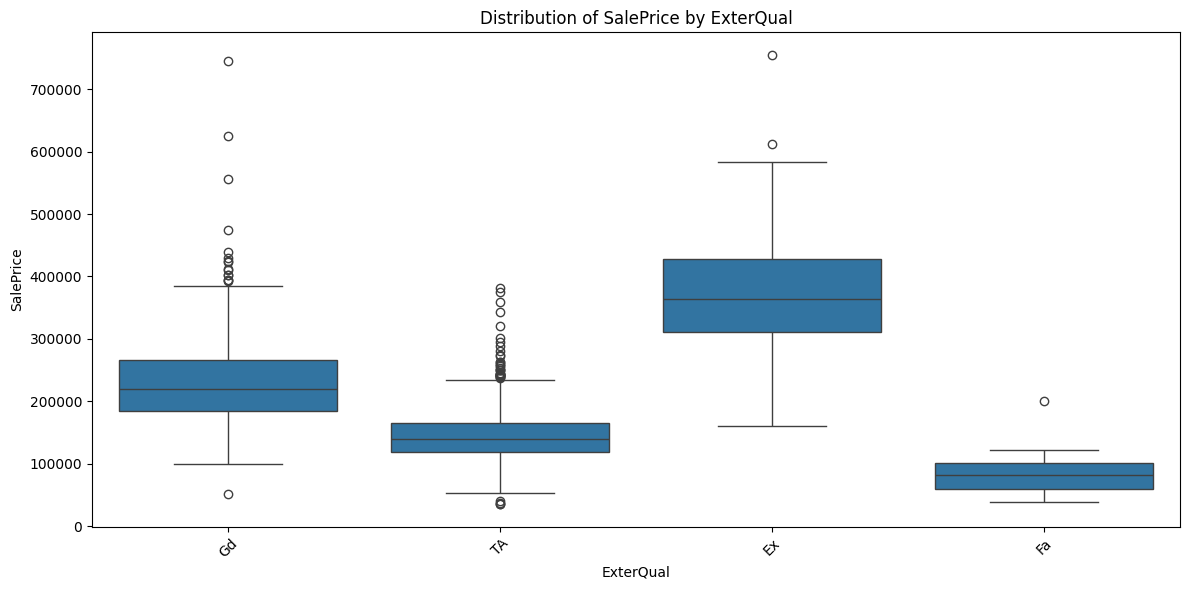

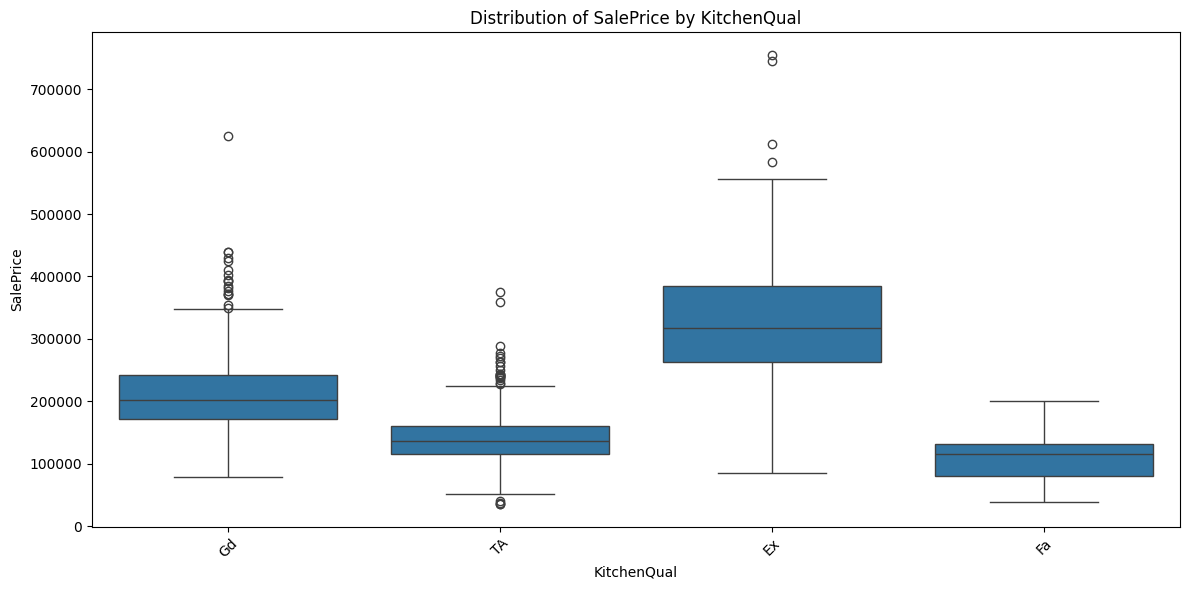

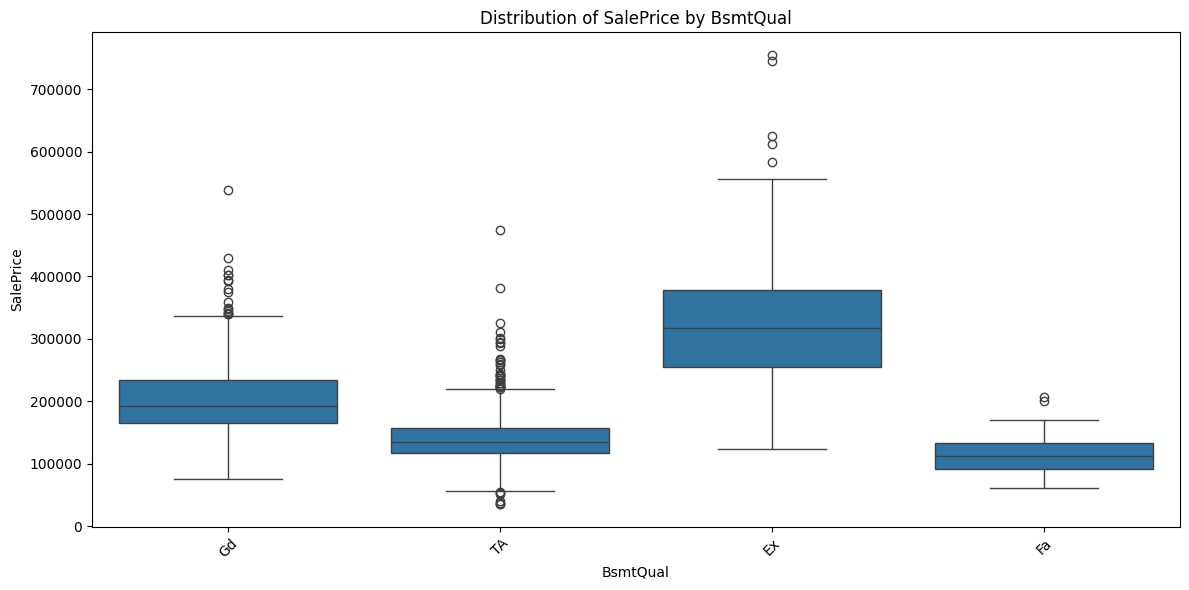

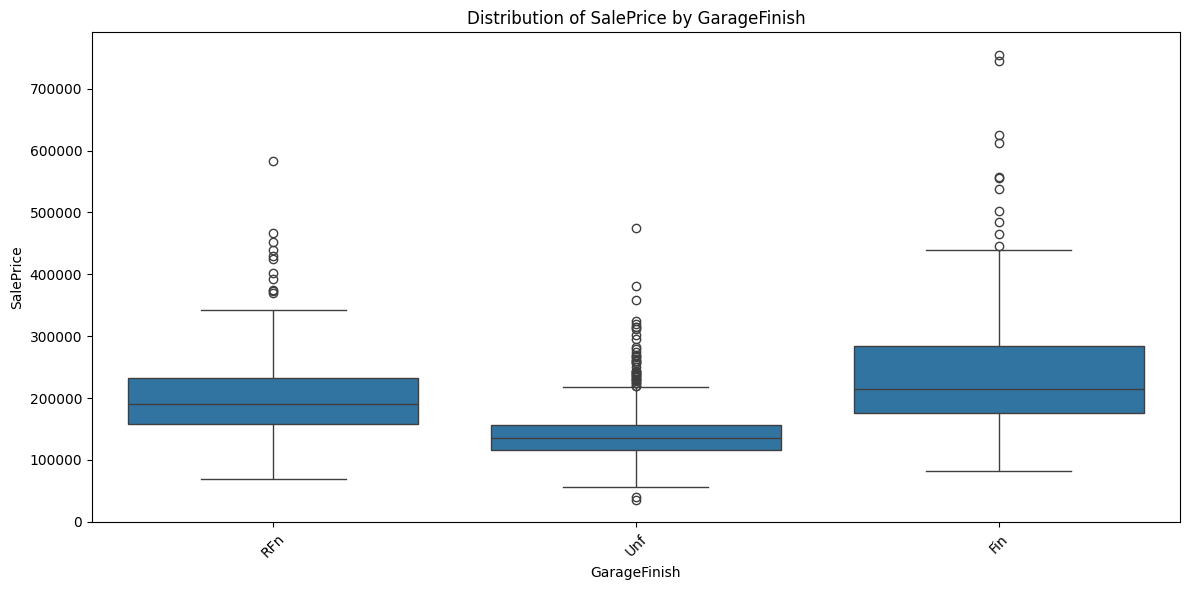

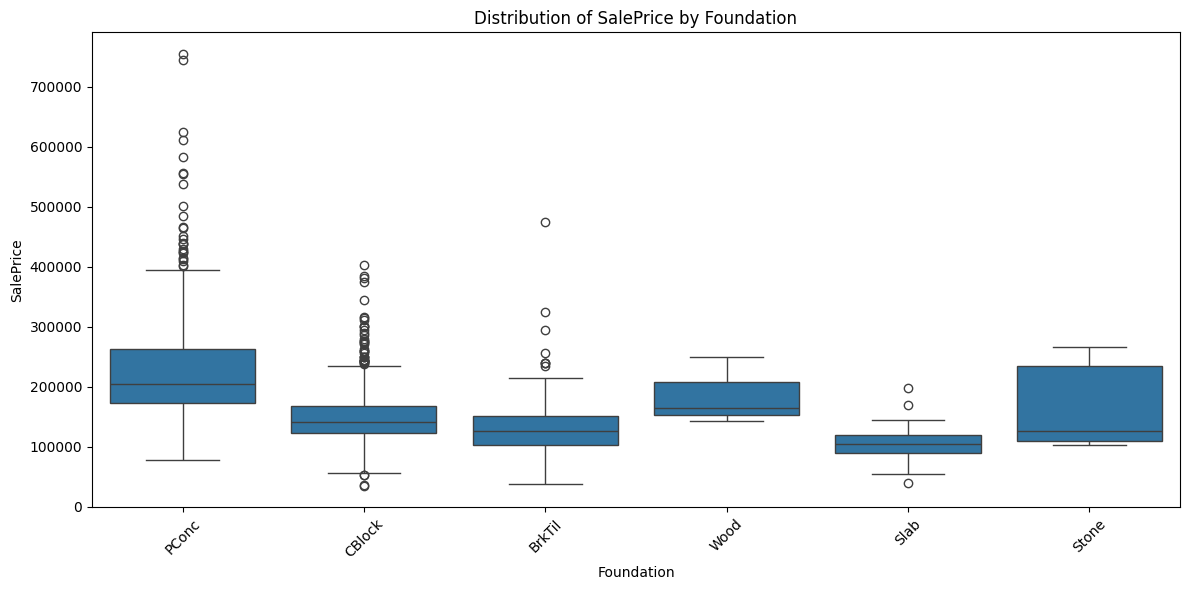


Tukey HSD results for ExterQual:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    Ex     Fa -279375.7473    0.0 -323896.9633 -234854.5313   True
    Ex     Gd -135727.4513    0.0 -157297.2472 -114157.6553   True
    Ex     TA -223019.6481    0.0  -244104.848 -201934.4481   True
    Fa     Gd   143648.296    0.0  103567.2848  183729.3071   True
    Fa     TA   56356.0992 0.0016   16533.7811   96178.4172   True
    Gd     TA  -87292.1968    0.0  -95594.8733  -78989.5203   True
------------------------------------------------------------------

Analysis complete. Results saved to CSV files.


In [120]:
# ======================================================
# AMES HOUSING PRICE PREDICTION - FEATURE ANALYSIS SCRIPT
# This script performs comprehensive feature analysis to:
# 1. Identify important numerical features using robust correlation methods
# 2. Analyze categorical features using ANOVA
# 3. Visualize key relationships and potential outliers
# ======================================================
from scipy import stats
from scipy.stats import f_oneway
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# ======================================================
# DATA LOADING AND PREPARATION
# ======================================================
# Load the training dataset
train = pd.read_csv('train.csv')
target = 'SalePrice'  # Our target variable for prediction

# ======================================================
# PART 1: ROBUST CORRELATION ANALYSIS FOR NUMERICAL FEATURES
# This section analyzes numerical features using multiple correlation
# methods that are resistant to outliers
# ======================================================

def spearman_corr(x, y):
    """Calculate Spearman's rank correlation coefficient.
    Measures monotonic relationships (linear or nonlinear) and is robust to outliers."""
    return stats.spearmanr(x, y).correlation

def kendall_corr(x, y):
    """Calculate Kendall's tau correlation coefficient.
    Similar to Spearman but more robust with smaller sample sizes."""
    return stats.kendalltau(x, y).correlation

def mic_corr(x, y):
    """Calculate Maximal Information Coefficient (MIC).
    Detects both linear and nonlinear relationships between variables."""
    return mutual_info_regression(x.values.reshape(-1, 1), y)[0]

def quadrant_corr(x, y):
    """Calculate quadrant correlation coefficient.
    A simple but robust measure based on data point positions relative to medians."""
    x_med = np.median(x)
    y_med = np.median(y)
    n = len(x)

    # Count points in each quadrant
    a = np.sum((x > x_med) & (y > y_med))  # Top-right quadrant
    b = np.sum((x > x_med) & (y <= y_med))  # Bottom-right quadrant
    c = np.sum((x <= x_med) & (y > y_med))  # Top-left quadrant
    d = np.sum((x <= x_med) & (y <= y_med))  # Bottom-left quadrant

    return ((a + d) - (b + c)) / n  # Correlation calculation

# Prepare numerical features by:
# 1. Selecting only numerical columns
# 2. Dropping ID and target variables
numeric_features = train.select_dtypes(include=[np.number])
numeric_features = numeric_features.drop(['Id', target], axis=1, errors='ignore')

# Initialize dataframe to store correlation results
corr_df = pd.DataFrame(index=numeric_features.columns)

# Calculate all correlation measures for each numerical feature
y = train[target]
for col in numeric_features.columns:
    # Preserve outliers by only filling NA values with median
    x = train[col].fillna(train[col].median())

    # Calculate each correlation type
    corr_df.loc[col, 'spearman'] = spearman_corr(x, y)
    corr_df.loc[col, 'kendall'] = kendall_corr(x, y)
    corr_df.loc[col, 'mic'] = mic_corr(x, y)
    corr_df.loc[col, 'quadrant'] = quadrant_corr(x, y)
    corr_df.loc[col, 'pearson'] = stats.pearsonr(x, y)[0]  # Standard correlation for reference

# Create composite robust score that combines multiple measures
# Weights can be adjusted based on which measures you trust more
corr_df['robust_score'] = (0.4*corr_df['spearman'] +
                          0.3*corr_df['kendall'] +
                          0.3*corr_df['mic'])

# Sort features by robust_score to identify most important numerical features
corr_df = corr_df.sort_values('robust_score', ascending=False)

# Display top 10 numerical features
print("Top Numerical Features by Robust Correlation:")
print(corr_df.head(10)[['robust_score', 'spearman', 'kendall', 'mic']])

# ======================================================
# PART 2: ANOVA FOR CATEGORICAL VARIABLES
# This section analyzes categorical features using ANOVA to determine
# which categories have statistically significant price differences
# ======================================================

# Get list of categorical features (object dtype columns)
categorical_features = train.select_dtypes(include=['object']).columns.tolist()

# Perform one-way ANOVA for each categorical feature
anova_results = []
for col in categorical_features:
    # Prepare groups by:
    # 1. Dropping NA values
    # 2. Grouping by category values
    groups = [group[target].values for name, group in train[[col, target]].dropna().groupby(col)]

    # Need at least 2 groups to perform ANOVA
    if len(groups) >= 2:
        try:
            # Calculate ANOVA F-value and p-value
            f_val, p_val = f_oneway(*groups)
            anova_results.append({
                'feature': col,
                'f_value': f_val,  # Higher = more between-group variance
                'p_value': p_val,   # Lower = more statistically significant
                'n_categories': train[col].nunique()  # Number of categories
            })
        except:
            continue  # Skip if error occurs

# Create and sort ANOVA results dataframe
anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values('f_value', ascending=False)

# Filter for statistically significant results (p-value < 0.05)
significant_anova = anova_df[anova_df['p_value'] < 0.05]
print("\nSignificant Categorical Features by ANOVA:")
print(significant_anova.head(10))

# ======================================================
# PART 3: VISUALIZATIONS
# This section creates visualizations to help interpret the results
# ======================================================

# 1. Heatmap of top numerical feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df.head(15)[['spearman', 'kendall', 'mic', 'robust_score']],
            annot=True, cmap='coolwarm', center=0)
plt.title('Top Numerical Features by Robust Correlation')
plt.tight_layout()
plt.show()

# 2. Bar plot of significant ANOVA results
if not significant_anova.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=significant_anova.head(15), x='f_value', y='feature')
    plt.title('Most Significant Categorical Features (ANOVA F-values)')
    plt.xlabel('F-value (higher = more significant)')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# 3. Boxplots for top categorical features
if not significant_anova.empty:
    for feature in significant_anova.head(5)['feature']:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=train, x=feature, y=target)
        plt.title(f'Distribution of SalePrice by {feature}')
        plt.xticks(rotation=45)  # Rotate x-labels for readability
        plt.tight_layout()
        plt.show()

# 4. Tukey's HSD post-hoc test for top categorical feature
# This tells us which specific category pairs are significantly different
if not significant_anova.empty:
    top_cat = significant_anova.iloc[0]['feature']
    try:
        tukey = pairwise_tukeyhsd(endog=train[target].dropna(),
                                groups=train[top_cat].dropna(),
                                alpha=0.05)
        print(f"\nTukey HSD results for {top_cat}:")
        print(tukey.summary())
    except:
        print(f"\nCould not perform Tukey HSD for {top_cat} - possibly too many categories")

# ======================================================
# SAVE RESULTS FOR FURTHER ANALYSIS
# ======================================================
# Save numerical correlations to CSV
corr_df.to_csv('numerical_correlations.csv')

# Save significant ANOVA results to CSV
if not significant_anova.empty:
    significant_anova.to_csv('significant_anova_results.csv')

print("\nAnalysis complete. Results saved to CSV files.")

In [34]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

OverallQual
1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: count, dtype: int64


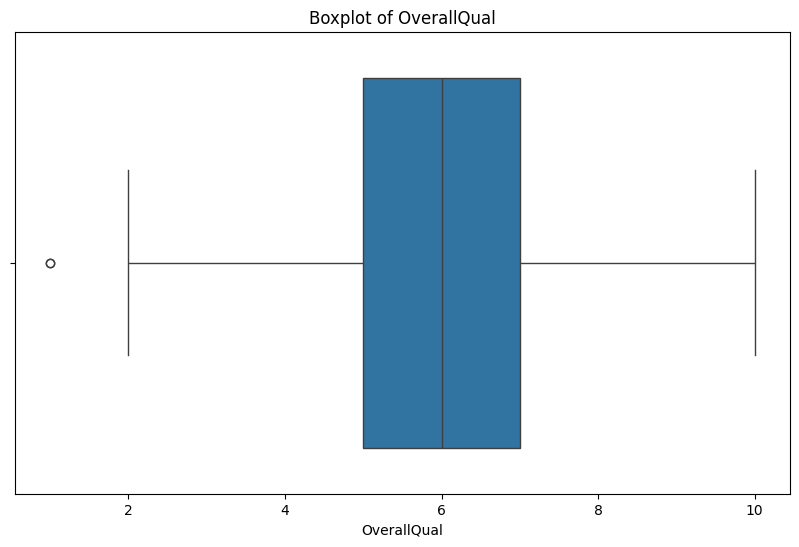

Outliers found: 2
Percentage: 0.14%


In [35]:
print(train['OverallQual'].value_counts().sort_index())

plt.figure(figsize=(10,6))
sns.boxplot(x=train['OverallQual'])
plt.title("Boxplot of OverallQual")
plt.show()

Q1 = train['OverallQual'].quantile(0.25)
Q3 = train['OverallQual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

overallqual_outliers = train[
    (train['OverallQual'] < lower_bound) | (train['OverallQual'] > upper_bound)
]
print(f"Outliers found: {len(overallqual_outliers)}")
print(f"Percentage: {len(overallqual_outliers)/len(train)*100:.2f}%")


In [36]:
train = train.drop(overallqual_outliers.index)

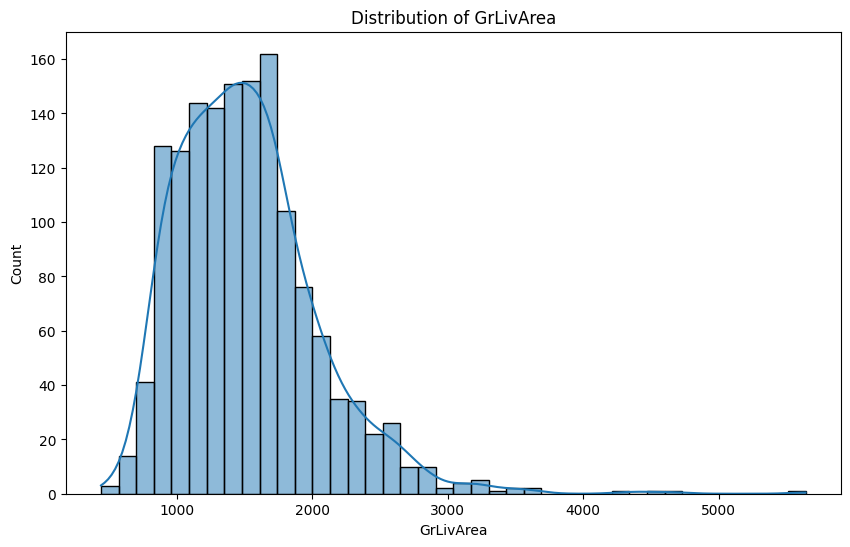

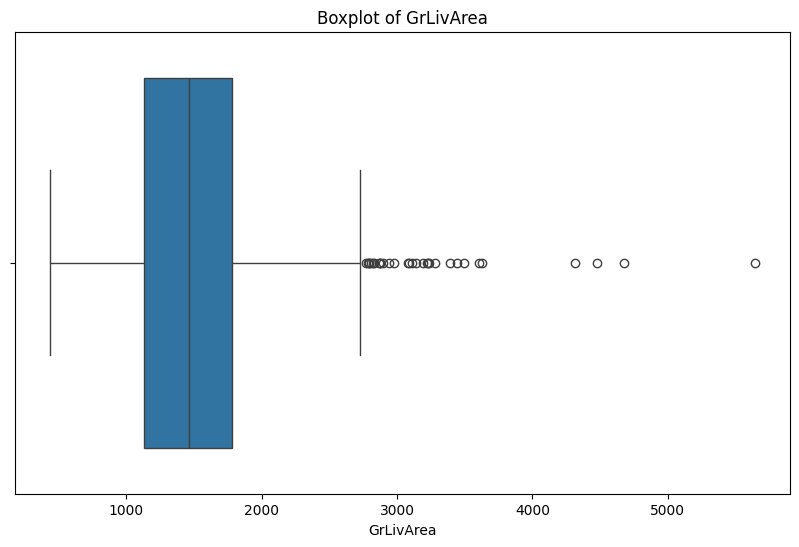

Outliers count: 31
Percentage: 2.13%


In [37]:
train['GrLivArea'].describe()

plt.figure(figsize=(10,6))
sns.histplot(train['GrLivArea'], kde=True, bins=40)
plt.title("Distribution of GrLivArea")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=train['GrLivArea'])
plt.title("Boxplot of GrLivArea")
plt.show()

Q1 = train['GrLivArea'].quantile(0.25)
Q3 = train['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

grliv_outliers = train[(train['GrLivArea'] < lower_bound) | (train['GrLivArea'] > upper_bound)]
print(f"Outliers count: {len(grliv_outliers)}")
print(f"Percentage: {len(grliv_outliers)/len(train)*100:.2f}%")


In [38]:
train['GrLivArea'] = np.where(train['GrLivArea'] > upper_bound, upper_bound,
                              np.where(train['GrLivArea'] < lower_bound, lower_bound, train['GrLivArea']))


In [39]:
train['GarageCars'].value_counts().sort_index()


,count
GarageCars,
0,79
1,369
2,824
3,181
4,5


GarageCars is a discrete numerical feature (specifically ordinal, or even categorical-like).
It only takes integer values: 0, 1, 2, 3, 4 (and very rarely 5+).

These values don't follow a continuous distribution, so applying IQR or Gaussian-based trimming/capping isn’t ideal.

Why? Because outlier detection (like IQR or Z-score) is designed for continuous variables.

So here we use Luxury/not luxuary (common sense) to handle outliers.

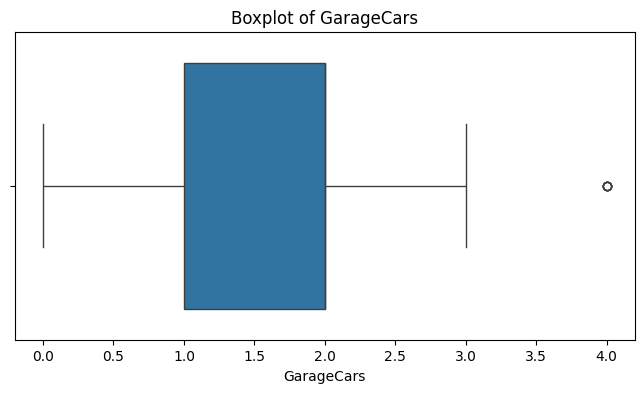

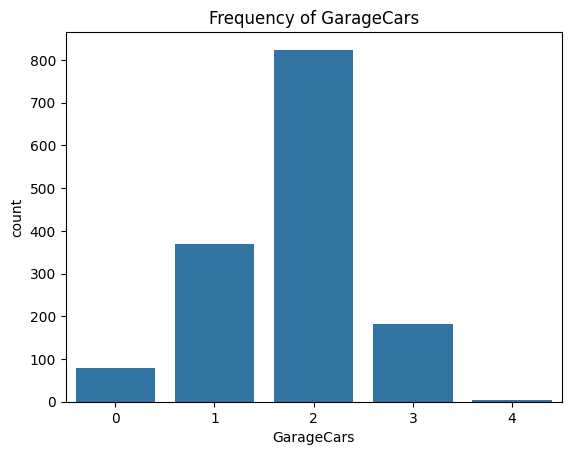

In [40]:
plt.figure(figsize=(8,4))
sns.boxplot(x=train['GarageCars'])
plt.title("Boxplot of GarageCars")
plt.show()

sns.countplot(x=train['GarageCars'])
plt.title("Frequency of GarageCars")
plt.show()


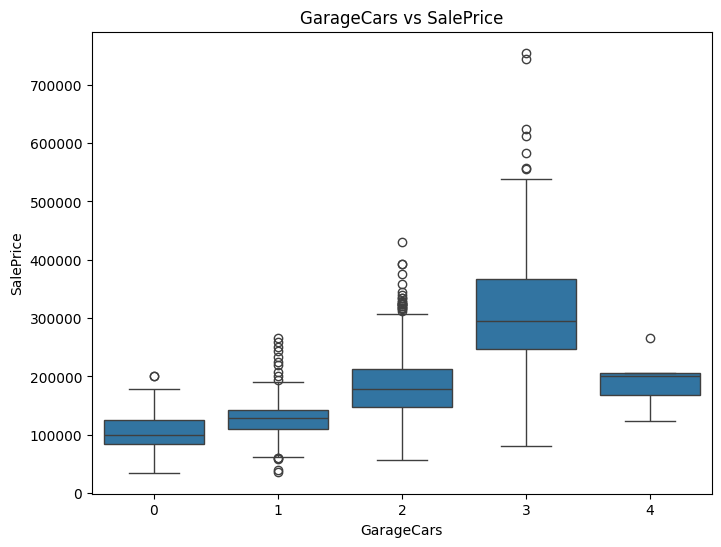

In [41]:
# Boxplot of GarageCars vs SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train)
plt.title('GarageCars vs SalePrice')
plt.show()


In [42]:
print(train[train['GarageCars'] == 4].shape)

train[train['GarageCars'] == 4]['YearBuilt'].value_counts().sort_index()


(5, 77)


,count
YearBuilt,
1880,1
1961,1
1969,1
1971,1
1997,1


Since GarageCars is an ordinal and interpretable feature, and it's correlated with price overall, it's not needed to remove these 5 rows just because they're "off".
Since we are planning robust regression modeling:
**Leave them as-is**
Recommended for tree-based models like Random Forest and XGBoost.

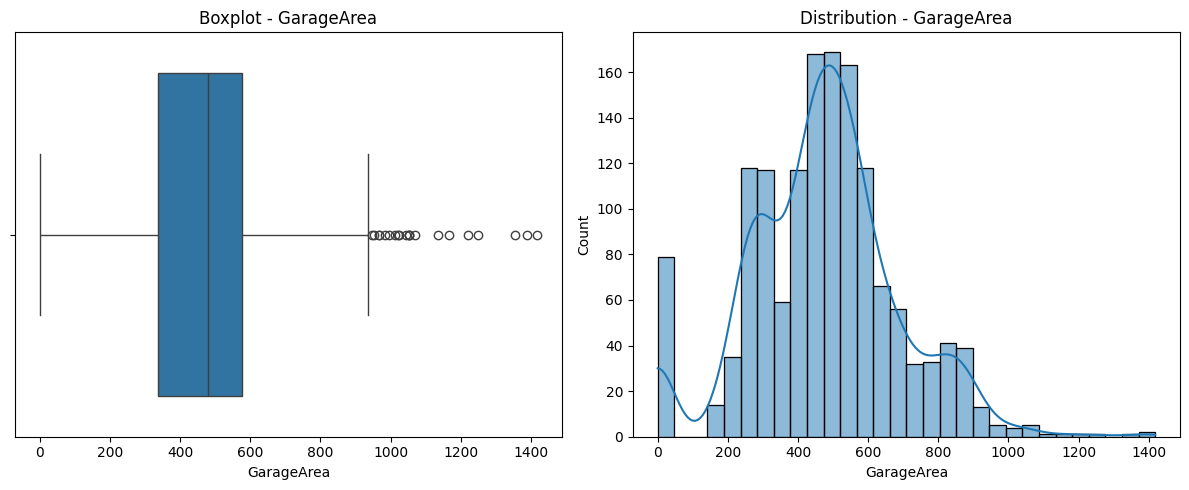

Skewness: 0.1875464534620407


In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=train['GarageArea'])
plt.title('Boxplot - GarageArea')

plt.subplot(1, 2, 2)
sns.histplot(train['GarageArea'], bins=30, kde=True)
plt.title('Distribution - GarageArea')

plt.tight_layout()
plt.show()

print("Skewness:", train['GarageArea'].skew())


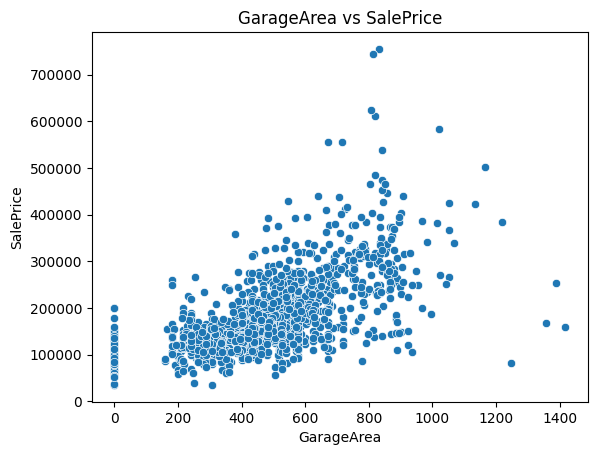

In [44]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=train)
plt.title('GarageArea vs SalePrice')
plt.show()


In [45]:
Q1 = train['GarageArea'].quantile(0.25)
Q3 = train['GarageArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

garage_outliers = train[train['GarageArea'] > upper_bound]
print("GarageArea outliers:", garage_outliers.shape[0])
garage_outliers[['GarageArea', 'SalePrice', 'OverallQual', 'GrLivArea']].sort_values(by='GarageArea', ascending=False)

gararea_outliers = train[(train['GarageArea'] < lower_bound) | (train['GarageArea'] > upper_bound)]
print(f"Outliers count: {len(gararea_outliers)}")
print(f"Percentage: {len(gararea_outliers)/len(train)*100:.2f}%")


Lower Bound: -24.0, Upper Bound: 936.0
GarageArea outliers: 21
Outliers count: 21
Percentage: 1.44%


In [46]:
# Cap the values
train['GarageArea'] = train['GarageArea'].clip(lower=lower_bound, upper=upper_bound)

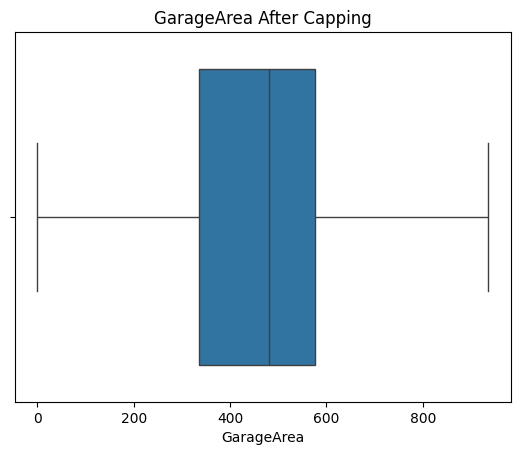

In [47]:
sns.boxplot(x=train['GarageArea'])
plt.title("GarageArea After Capping")
plt.show()


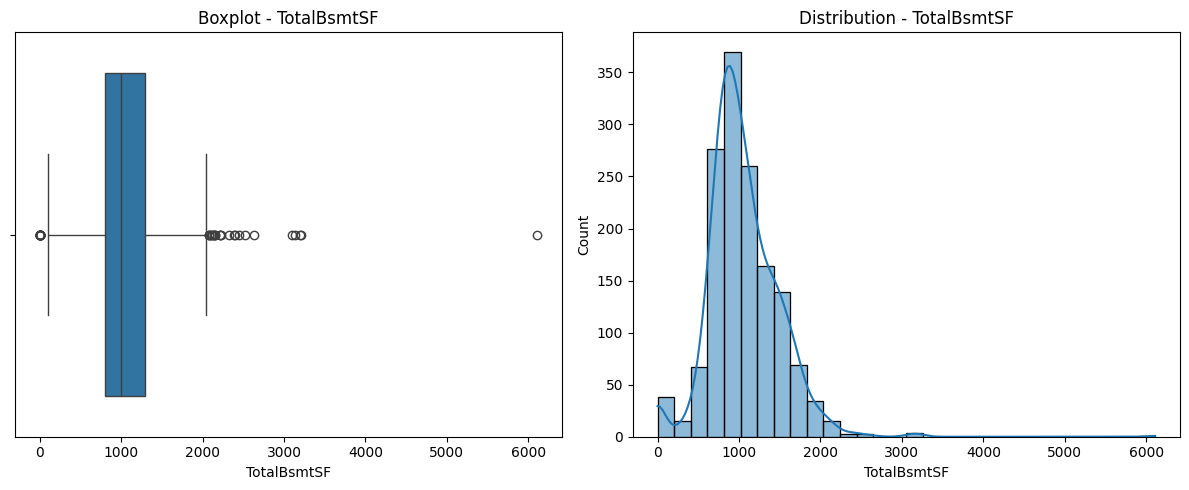

Skewness: 1.5368839003167247


In [48]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=train['TotalBsmtSF'])
plt.title('Boxplot - TotalBsmtSF')

plt.subplot(1, 2, 2)
sns.histplot(train['TotalBsmtSF'], bins=30, kde=True)
plt.title('Distribution - TotalBsmtSF')

plt.tight_layout()
plt.show()

print("Skewness:", train['TotalBsmtSF'].skew())


In [49]:
Q1 = train['TotalBsmtSF'].quantile(0.25)
Q3 = train['TotalBsmtSF'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

outliers = train[train['TotalBsmtSF'] > upper_bound]
print("Outliers found:", outliers.shape[0])

# See their sale price and quality
outliers[['TotalBsmtSF', 'SalePrice', 'OverallQual', 'GrLivArea']].sort_values(by='TotalBsmtSF', ascending=False)

Totbsmt_outliers = train[(train['TotalBsmtSF'] < lower_bound) | (train['TotalBsmtSF'] > upper_bound)]
print(f"Outliers count: {len(Totbsmt_outliers)}")
print(f"Percentage: {len(Totbsmt_outliers)/len(train)*100:.2f}%")



Lower Bound: 41.875, Upper Bound: 2052.875
Outliers found: 24
Outliers count: 60
Percentage: 4.12%


In [50]:
train['TotalBsmtSF'] = train['TotalBsmtSF'].clip(lower=lower_bound, upper=upper_bound)

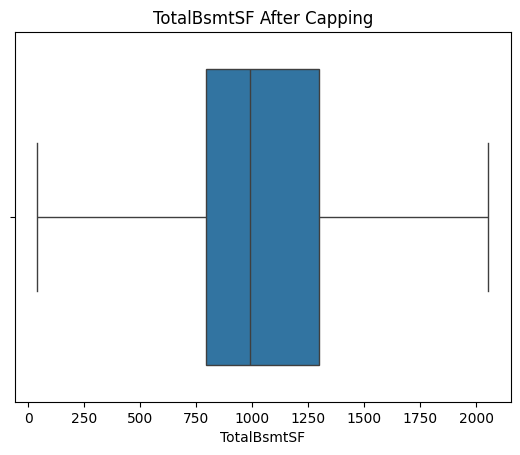

In [51]:
sns.boxplot(x=train['TotalBsmtSF'])
plt.title("TotalBsmtSF After Capping")
plt.show()


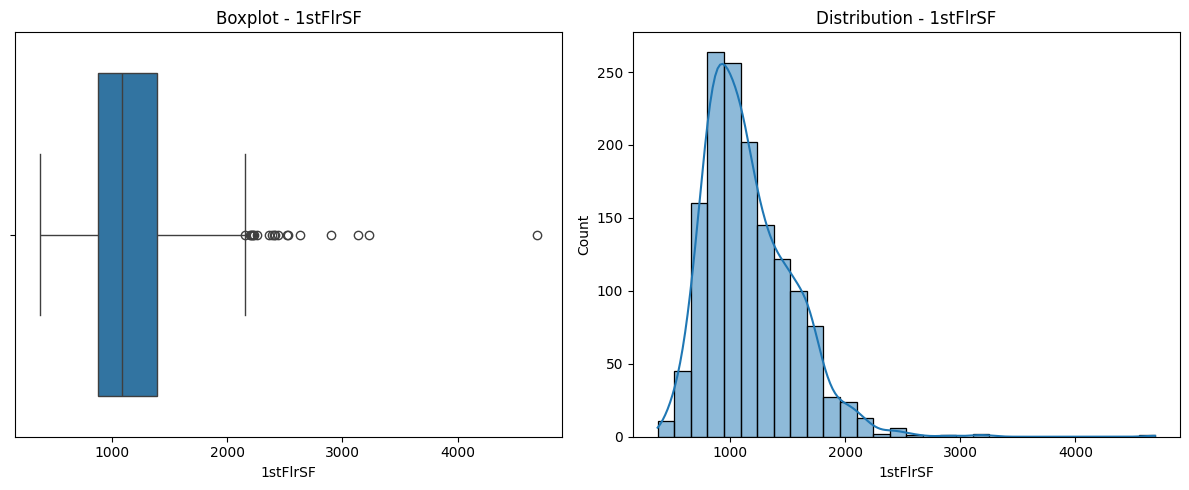

In [52]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=train['1stFlrSF'])
plt.title('Boxplot - 1stFlrSF')

plt.subplot(1, 2, 2)
sns.histplot(train['1stFlrSF'], bins=30, kde=True)
plt.title('Distribution - 1stFlrSF')

plt.tight_layout()
plt.show()


In [53]:
Q1 = train['1stFlrSF'].quantile(0.25)
Q3 = train['1stFlrSF'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

outliers = train[train['1stFlrSF'] > upper_bound]
print("Outliers found:", outliers.shape[0])

# See their sale price and quality
outliers[['1stFlrSF', 'SalePrice', 'OverallQual', 'GrLivArea']].sort_values(by='1stFlrSF', ascending=False)

stflr_outliers = train[(train['1stFlrSF'] < lower_bound) | (train['1stFlrSF'] > upper_bound)]
print(f"Outliers count: {len(stflr_outliers)}")
print(f"Percentage: {len(stflr_outliers)/len(train)*100:.2f}%")

Lower Bound: 117.375, Upper Bound: 2156.375
Outliers found: 19
Outliers count: 19
Percentage: 1.30%


In [54]:
train['1stFlrSF'] = train['1stFlrSF'].clip(lower=lower_bound, upper=upper_bound)

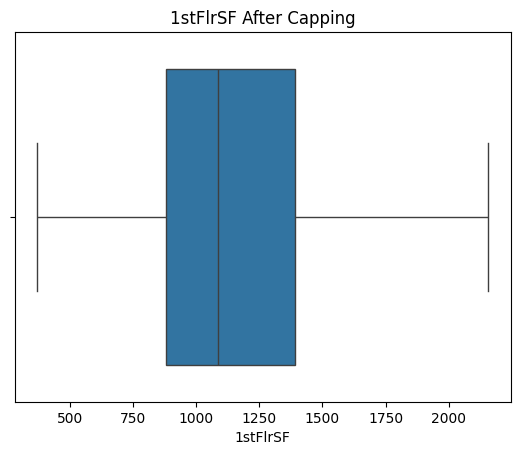

In [55]:
sns.boxplot(x=train['1stFlrSF'])
plt.title("1stFlrSF After Capping")
plt.show()


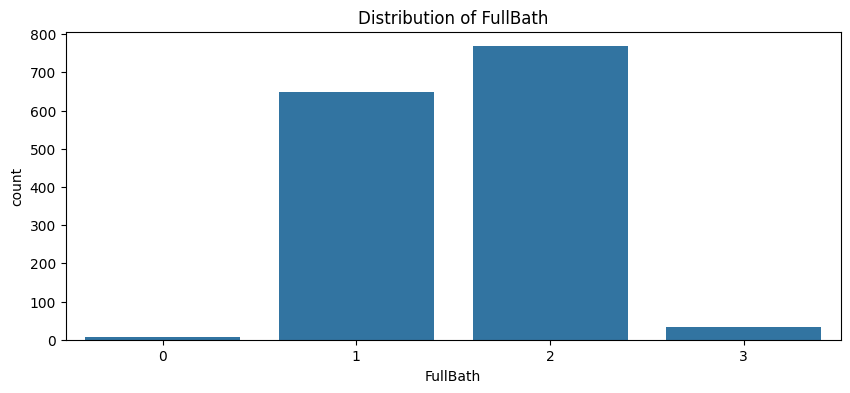

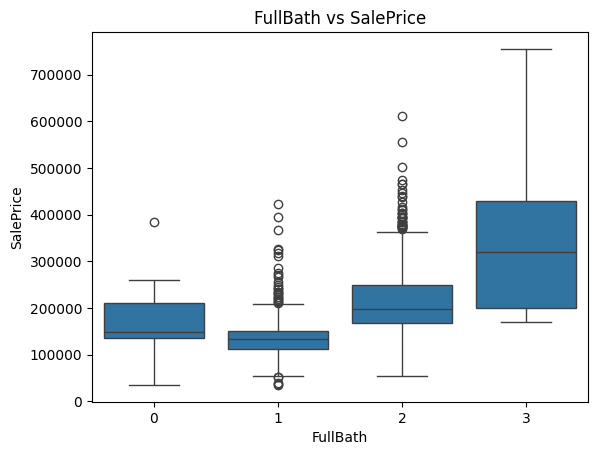

,count
FullBath,
2,768
1,649
3,33
0,8


In [56]:
plt.figure(figsize=(10, 4))

# Count how many houses have 0, 1, 2, 3... FullBaths
sns.countplot(x='FullBath', data=train)
plt.title("Distribution of FullBath")
plt.show()

sns.boxplot(x='FullBath', y='SalePrice', data=train)
plt.title("FullBath vs SalePrice")
plt.show()

train['FullBath'].value_counts()

In [57]:
# Step 1: Filter the 3-bathroom homes
fullbath_3 = train[train['FullBath'] == 3].copy()

# Step 2: Define thresholds (you can tweak based on your EDA)
luxury_price_threshold = train['SalePrice'].quantile(0.90)
quality_threshold = 8
area_threshold = train['GrLivArea'].quantile(0.75)
garage_threshold = train['GarageArea'].quantile(0.75)
basement_threshold = train['TotalBsmtSF'].quantile(0.75)

# Step 3: Flag luxury status
fullbath_3['IsFullBathJustified'] = (
    (fullbath_3['SalePrice'] >= luxury_price_threshold) &
    (fullbath_3['OverallQual'] >= quality_threshold) &
    (fullbath_3['GrLivArea'] >= area_threshold) &
    (fullbath_3['GarageArea'] >= garage_threshold) &
    (fullbath_3['TotalBsmtSF'] >= basement_threshold)
)

# Step 4: Review false rows (optional)
false_rows = fullbath_3[~fullbath_3['IsFullBathJustified']]
print(false_rows[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']])


      SalePrice  OverallQual  GrLivArea  GarageArea  TotalBsmtSF
11       345000            9       2324         736         1175
20       325300            8       2376         853         1158
35       309000            8       2452         691         1117
118      320000            7       2749         594         1673
137      171000            7       1959         766         1907
304      295000            7       2749         870         1470
320      342643            9       2596         840         1249
362      198500            7       1922         672           42
496      430000            8       2749         546         2053
523      184750           10       2749         884         2053
529      200624            6       2515         484         2035
583      325000           10       2749         880         1237
607      225000            5       2008         230          896
686      227875            7       1761         578          874
738      179000          

In [58]:
fullbath_0 = train[train['FullBath'] == 0].copy()

# Check some other relevant features
print(fullbath_0[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']])


      SalePrice  OverallQual  GrLivArea  GarageArea  TotalBsmtSF
53       385000            9       1842         894         1842
188      153337            5       1224         528         1086
597      194201            7       1402         648         1258
634      144000            6       1056         576         1056
916       35311            2        480         308          480
1163     108959            4       1258         400         1198
1213     145000            4        960         364          648
1270     260000            7       1524         586         1332


In [59]:
# Step 5: Remove unjustified luxury rows from original dataset
ids_to_remove = fullbath_3[~fullbath_3['IsFullBathJustified']].index
train.drop(index=ids_to_remove, inplace=True)


In [60]:
train = train[train['FullBath'] != 0]

TotRmsAbvGrd
3      16
4      93
5     273
6     400
7     325
8     184
9      69
10     44
11     13
12      9
14      1
Name: count, dtype: int64


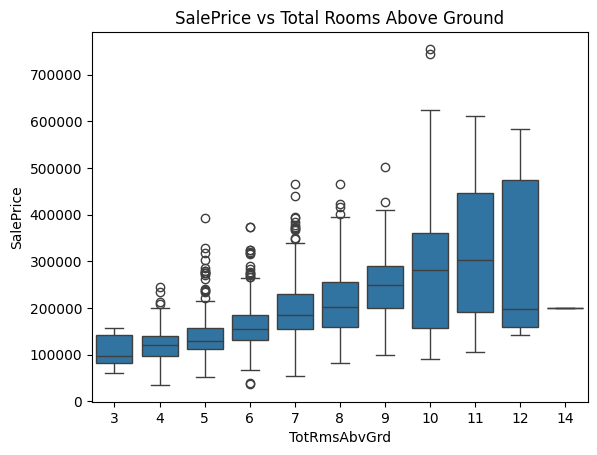

In [61]:
print(train['TotRmsAbvGrd'].value_counts().sort_index())
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=train)
plt.title('SalePrice vs Total Rooms Above Ground')
plt.show()


In [62]:
luxury_price = train['SalePrice'].quantile(0.90)

train['IsRoomCountJustified'] = (
    (train['TotRmsAbvGrd'] > 10) &
    (train['SalePrice'] > luxury_price) &
    (train['OverallQual'] >= 8) &
    (train['GrLivArea'] > 2500)
)

unjustified_outliers = train[
    (train['TotRmsAbvGrd'] > 10) &
    (~train['IsRoomCountJustified'])
]
unjustified_outliers[['TotRmsAbvGrd', 'SalePrice', 'OverallQual', 'GrLivArea']]



,TotRmsAbvGrd,SalePrice,OverallQual,GrLivArea
324,11,242000,7,2749
635,14,200000,6,2749
809,11,106000,5,2138
897,12,142953,5,2240
898,11,611657,9,2364
910,12,154300,5,2274
961,11,272000,6,2749
1031,12,197000,7,2749
1230,12,190000,5,2620
1292,11,107500,5,2372


In [63]:
room_outlier_mask = (train['TotRmsAbvGrd'] > 10) & (~train['IsRoomCountJustified'])
train = train[~room_outlier_mask]


4/7/2025

In [64]:
train['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968, 2007,
       1951, 1957, 1927, 1920, 1966, 1959, 2005, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1964, 1999, 1972, 1921, 1945, 1982,
       1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977, 1985,
       1979, 1885, 1919, 1969, 1935, 1971, 1952, 1936, 1923, 1924, 1984,
       1926, 1940, 1981, 1941, 1987, 1986, 1988, 2008, 1908, 1892, 1990,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1928, 1978, 1996, 2010, 1946, 1913, 1937, 1942, 1938, 1974, 1922,
       1914, 1880, 1906, 1890, 1904, 1882, 1875, 1911, 1917, 1872, 1905])

In [65]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

/tmp/ipython-input-65-1979233350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['HouseAge'] = train['YrSold'] - train['YearBuilt']


In [66]:
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

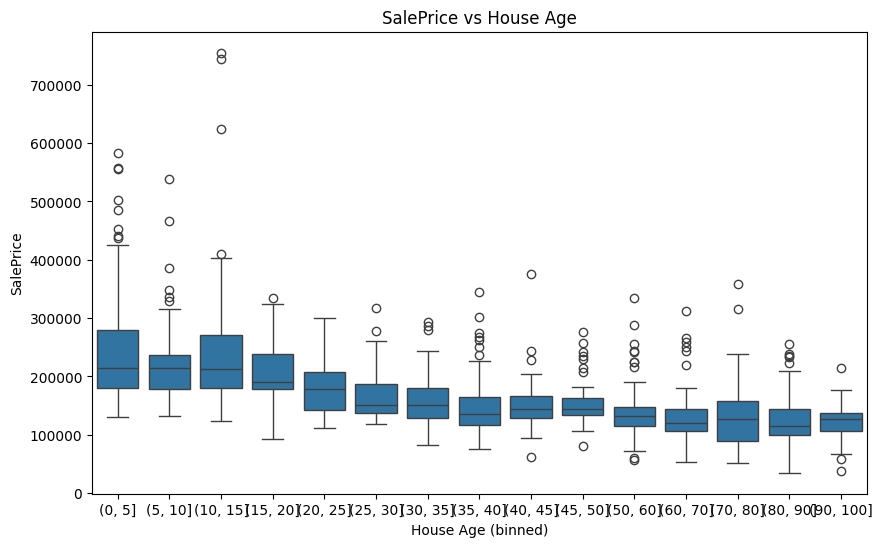

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(train['HouseAge'], bins=[0,5,10,15, 20, 25, 30, 35, 40 ,45, 50,60,70,80,90, 100]), y='SalePrice', data=train)
plt.title("SalePrice vs House Age")
plt.xlabel("House Age (binned)")
plt.ylabel("SalePrice")
plt.show()


Lower Bound: -63.5, Upper Bound: 124.5
Outliers found: 6
Outliers count: 6
Percentage: 0.42%
Skewness: 0.587345512127599


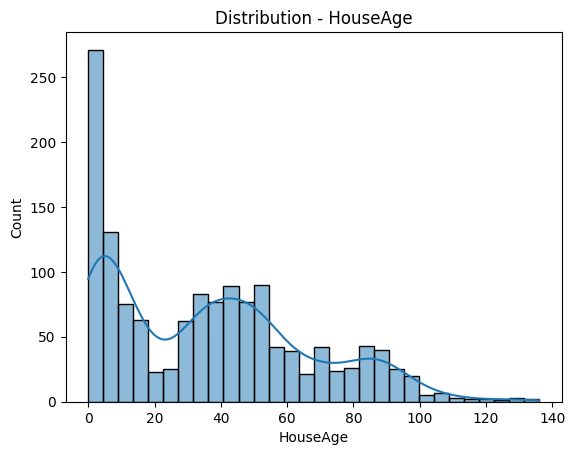

In [68]:
sns.histplot(train['HouseAge'], bins=30, kde=True)
plt.title('Distribution - HouseAge')


Q1 = train['HouseAge'].quantile(0.25)
Q3 = train['HouseAge'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

outliers = train[train['HouseAge'] > upper_bound]
print("Outliers found:", outliers.shape[0])


Houseage_outliers = train[(train['HouseAge'] < lower_bound) | (train['HouseAge'] > upper_bound)]
print(f"Outliers count: {len(Houseage_outliers)}")
print(f"Percentage: {len(Houseage_outliers)/len(train)*100:.2f}%")


print("Skewness:", train['HouseAge'].skew())

In [69]:
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']

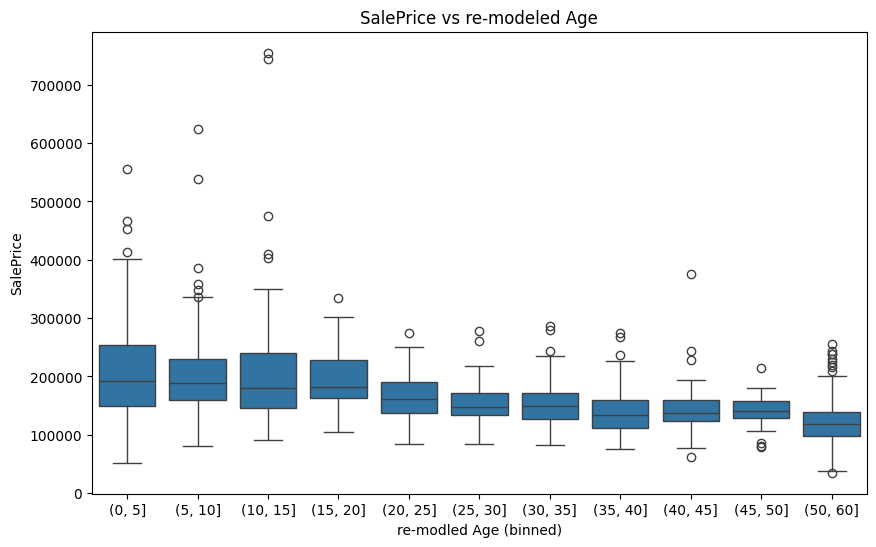

Skewness: 0.4940589517345383


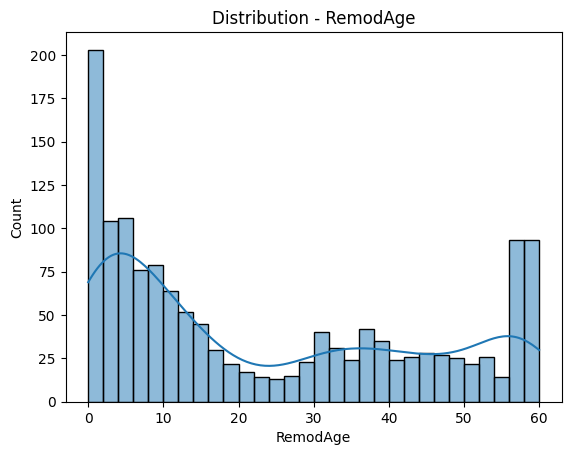

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(train['RemodAge'], bins=[0,5,10,15, 20, 25, 30, 35, 40 ,45, 50,60]), y='SalePrice', data=train)
plt.title("SalePrice vs re-modeled Age")
plt.xlabel("re-modled Age (binned)")
plt.ylabel("SalePrice")
plt.show()

sns.histplot(train['RemodAge'], bins=30, kde=True)
plt.title('Distribution - RemodAge')

print("Skewness:", train['RemodAge'].skew())

In [71]:
Q1 = train['RemodAge'].quantile(0.25)
Q3 = train['RemodAge'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

outliers = train[train['RemodAge'] > upper_bound]
print("Outliers found:", outliers.shape[0])


RemodAge_outliers = train[(train['RemodAge'] < lower_bound) | (train['RemodAge'] > upper_bound)]
print(f"Outliers count: {len(RemodAge_outliers)}")
print(f"Percentage: {len(RemodAge_outliers)/len(train)*100:.2f}%")

Lower Bound: -53.0, Upper Bound: 99.0
Outliers found: 0
Outliers count: 0
Percentage: 0.00%


In [72]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRoomCountJustified,HouseAge,RemodAge
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2008,WD,Normal,208500,False,5,5
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,5,2007,WD,Normal,181500,False,31,31
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,9,2008,WD,Normal,223500,False,7,6
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,2,2006,WD,Abnorml,140000,False,91,36
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,12,2008,WD,Normal,250000,False,8,8


In the second stage of outliers handling, and after the top correleted's outliers were handled; we will handle the outliers of the remainging continuous numerical variables using automated method.

In [73]:
# Get all numeric columns
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Remove SalePrice and already-handled features
already_handled = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
                   'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                   'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'HouseAge','RemodAge']

# Remove discrete or categorical numeric features (e.g., MoSold)
likely_discrete = ['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'MoSold', 'YrSold']

# Final list of features to process
features_to_handle = [col for col in numeric_cols if col not in already_handled + likely_discrete]


In [74]:
print(features_to_handle)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [75]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))


In [76]:
for col in features_to_handle:
    cap_outliers_iqr(train, col)
    cap_outliers_iqr(test, col)